## <font color=blue>Contents<font/>

#########################################################################################################

1. **Jupyter setup <br>**
2. **Data Load <br>**
3. **Define Business Case Question**
4. **Identify Relevant Features to Include**
5. **Exploratory Data Analysis <br>**
    * **Identify Variables and Variable Types and Clean**
    * **Identify and Handle Missing Values**
    * **Inspect Distributions**<br><br>
6. **Regression Model Builds**<br>
    * **build baseline**
    *

#########################################################################################################

## <font color=blue>Jupyter Setup<font/>

###  Import required libraries (for EDA):

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 600)

## <font color=blue>Data Load<font/>

### Load Metadata:

In [3]:
# import excel file (contains multiple worksheets)
source_data_excel = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')  

In [4]:
# inspect worksheet names within imported excel file
source_data_excel.sheet_names

['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [5]:
# the following two worksheets contain metadata on the various features available within the remaining worksheets
# of the excel file

# source_data_excel.parse('Ranked Measure Sources & Years')
# source_data_excel.parse('Addtl Measure Sources & Years')

### Load Data

In [6]:
# alternatively, import the raw data (minus the metadata) from the csv files
source_data_csv = pd.read_csv('analytic_data2019.csv');

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,24

In [7]:
source_data_csv.shape

(3195, 534)

the data set contains 3,195 rows and 534 features

In [8]:
source_data_csv.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature death denominator Premature death CI low Premature death CI high  \
0            v001_denominator             v001_cilow             v001_cihigh   
1                   908266078           6890.3492059             6910.911502   
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   

  Premature death (Black) Premature death (Hispanic) Premature death (White)  \
0         v001_race_black         v001_race_hispanic         v001_race_white   
1                     NaN                        NaN                     NaN   
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   

  Poor or fair health raw value Poor or fair health numerator  \
0                 v002_rawvalue                v002_numerator   
1                           NaN                           NaN   
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   

  Poor or fair health denominator Poor or fair health CI low  \
0                v002_denominator                 v002_cilow   
1                             NaN                        NaN   
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   

  Poor or fair health CI high Poor physical health days raw value  \
0                 v002_cihigh                       v036_rawvalue   
1                         NaN                                 NaN   
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   

  Poor physical health days numerator Poor physical health days denominator  \
0                      v036_numerator                      v036_denominator   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Poor physical health days CI low Poor physical health days CI high  \
0                       v036_cilow                       v036_cihigh   
1                              NaN                               NaN 

## <font color=blue>Define Business Case Question<font/>

blah blah

The target variable **`Diabetes prevalence raw value`** is dated **2015** (check metadata file) whereas many of the other features are dated later than 2015.

It is not appropriate to try and predict a variable in the past using variables from the 'future'.

Therefore, we have obtained the most up-to-date 'Diabetes prevalence raw value' (as well as two other variables) from additional sources and will now to import and merge and replacve with the 'older' variables within our original dataset.

In [204]:
diabetes_2016 = pd.read_csv('DiabetesAtlasCountyData.csv')

In [205]:
diabetes_2016.head()

County    State  CountyFIPS Percentage Lower Limit  Upper Limit
0  Autauga County  Alabama        1001       11.1         7.8         15.5
1  Baldwin County  Alabama        1003       10.7           9         12.6
2  Barbour County  Alabama        1005       17.6        12.3         23.9
3     Bibb County  Alabama        1007       14.5         9.5           21
4   Blount County  Alabama        1009         17        12.7         22.2

In [206]:
types = {i: set(map(type, diabetes_2016[i])) for i in diabetes_2016.columns} 
types

{'County': {str},
 'State': {str},
 'CountyFIPS': {int},
 'Percentage': {str},
 'Lower Limit': {str},
 ' Upper Limit': {str}}

In [220]:
diabetes_2016['Percentage'] = diabetes_2016['Percentage'].apply(pd.to_numeric) 

In [207]:
# the CountyFIPS variable will be the joining variable with the original dataset but in the original dataset
# it is 5 characters long (leading zeroes):

# We need to add leading zeroes to this variable
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x).zfill(5))

In [208]:
diabetes_2016.head()

County    State CountyFIPS Percentage Lower Limit  Upper Limit
0  Autauga County  Alabama      01001       11.1         7.8         15.5
1  Baldwin County  Alabama      01003       10.7           9         12.6
2  Barbour County  Alabama      01005       17.6        12.3         23.9
3     Bibb County  Alabama      01007       14.5         9.5           21
4   Blount County  Alabama      01009         17        12.7         22.2

In [209]:
diabetes_2016['Percentage'].unique()

array(['11.1', '10.7', '17.6', '14.5', '17', '23.7', '19.2', '17.5',
       '19.9', '15.2', '18.6', '17.4', '22.4', '13.5', '12.5', '16.1',
       '16.2', '25.9', '20.8', '15.3', '18.2', '19.3', '15.8', '15.9',
       '12.8', '18.8', '15.7', '23.3', '14.8', '16.9', '17.8', '16.6',
       '16.5', '12.9', '13.8', '9', '13.9', '23', '20.4', '11.8', '14',
       '18.4', '12.7', '15', '12.3', '19', '10.5', '20.5', '16.3', '11.9',
       '14.2', '19.5', '12.6', '9.8', '7.8', '6.1', '14.9', '4.9', '10.3',
       '6.2', '7.4', '14.4', '6.5', '8.4', '9.2', '8', '4.7', '9.5',
       '8.7', '7.6', '10.8', '8.2', 'No Data', '13.6', '7.9', '11.2',
       '9.1', '16.8', '7.5', '9.9', '11.7', '14.1', '8.9', '15.4', '17.2',
       '8.5', '9.7', '17.1', '18.5', '19.6', '7.7', '19.4', '9.6', '13.1',
       '15.1', '14.6', '23.8', '29', '9.3', '16.4', '15.5', '18', '12.1',
       '17.3', '10.9', '18.7', '14.3', '20.9', '12.4', '18.3', '21.2',
       '13.4', '26.8', '6.9', '6.7', '21', '8.8', '10.2', '10.

In [221]:
diabetes_2016.info()
diabetes_2016.columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3225
Data columns (total 6 columns):
County          3220 non-null object
State           3220 non-null object
CountyFIPS      3220 non-null object
Percentage      3220 non-null float64
Lower Limit     3220 non-null object
 Upper Limit    3220 non-null object
dtypes: float64(1), object(5)
memory usage: 176.1+ KB


Index(['County', 'State', 'CountyFIPS', 'Percentage', 'Lower Limit',
       ' Upper Limit'],
      dtype='object')

In [219]:
diabetes_2016.drop(diabetes_2016.loc[diabetes_2016['Percentage']=='No Data'].index, inplace= True)

diabetes_2016.head()
diabetes_2016['Percentage'].unique()

array(['11.1', '10.7', '17.6', '14.5', '17', '23.7', '19.2', '17.5',
       '19.9', '15.2', '18.6', '17.4', '22.4', '13.5', '12.5', '16.1',
       '16.2', '25.9', '20.8', '15.3', '18.2', '19.3', '15.8', '15.9',
       '12.8', '18.8', '15.7', '23.3', '14.8', '16.9', '17.8', '16.6',
       '16.5', '12.9', '13.8', '9', '13.9', '23', '20.4', '11.8', '14',
       '18.4', '12.7', '15', '12.3', '19', '10.5', '20.5', '16.3', '11.9',
       '14.2', '19.5', '12.6', '9.8', '7.8', '6.1', '14.9', '4.9', '10.3',
       '6.2', '7.4', '14.4', '6.5', '8.4', '9.2', '8', '4.7', '9.5',
       '8.7', '7.6', '10.8', '8.2', '13.6', '7.9', '11.2', '9.1', '16.8',
       '7.5', '9.9', '11.7', '14.1', '8.9', '15.4', '17.2', '8.5', '9.7',
       '17.1', '18.5', '19.6', '7.7', '19.4', '9.6', '13.1', '15.1',
       '14.6', '23.8', '29', '9.3', '16.4', '15.5', '18', '12.1', '17.3',
       '10.9', '18.7', '14.3', '20.9', '12.4', '18.3', '21.2', '13.4',
       '26.8', '6.9', '6.7', '21', '8.8', '10.2', '10.4', '5.3', 

In [230]:
diabetes_2016_state= diabetes_2016.groupby('State').agg({'Percentage':'mean'}).reset_index()
diabetes_2016_state


State  Percentage
0                Alabama   16.355224
1                 Alaska    9.051724
2                Arizona   11.846667
3               Arkansas   15.445333
4             California    9.663793
5               Colorado    7.457812
6            Connecticut    8.937500
7               Delaware   12.166667
8   District of Columbia    8.100000
9                Florida   12.777612
10               Georgia   14.667296
11                Hawaii   10.100000
12                 Idaho    9.468182
13              Illinois   10.995098
14               Indiana   12.845652
15                  Iowa   10.592929
16                Kansas   11.240000
17              Kentucky   13.731667
18             Louisiana   14.523437
19                 Maine   10.343750
20              Maryland   11.800000
21         Massachusetts    9.042857
22              Michigan   12.159036
23             Minnesota    9.963218
24           Mississippi   16.000000
25              Missouri   13.090435
26               Montana    9.483929
27              Nebraska   10.255914
28                Nevada    9.982353
29         New Hampshire    9.550000
30            New Jersey    9.780952
31            New Mexico   10.924242
32              New York   10.861290
33        North Carolina   13.234000
34          North Dakota   10.169811
35                  Ohio   12.768182
36              Oklahoma   13.484416
37                Oregon   11.038889
38          Pennsylvania   11.576119
39           Puerto Rico   17.557692
40          Rhode Island    8.820000
41        South Carolina   15.341304
42          South Dakota   11.272727
43             Tennessee   14.448421
44                 Texas   11.362205
45                  Utah    8.503448
46               Vermont    9.214286
47              Virginia   12.765414
48            Washington   10.207692
49         West Virginia   15.390909
50             Wisconsin    9.988889
51               Wyoming    9.369565

In [232]:
diabetes_2016_state.sort_values(by=['Percentage'],ascending=True,inplace=True)

diabetes_2016_state.head()

State  Percentage
5               Colorado    7.457812
8   District of Columbia    8.100000
45                  Utah    8.503448
40          Rhode Island    8.820000
6            Connecticut    8.937500

In [227]:
diabetes_2016_state.tail()

State  Percentage
49  West Virginia   15.390909
3        Arkansas   15.445333
24    Mississippi   16.000000
0         Alabama   16.355224
39    Puerto Rico   17.557692

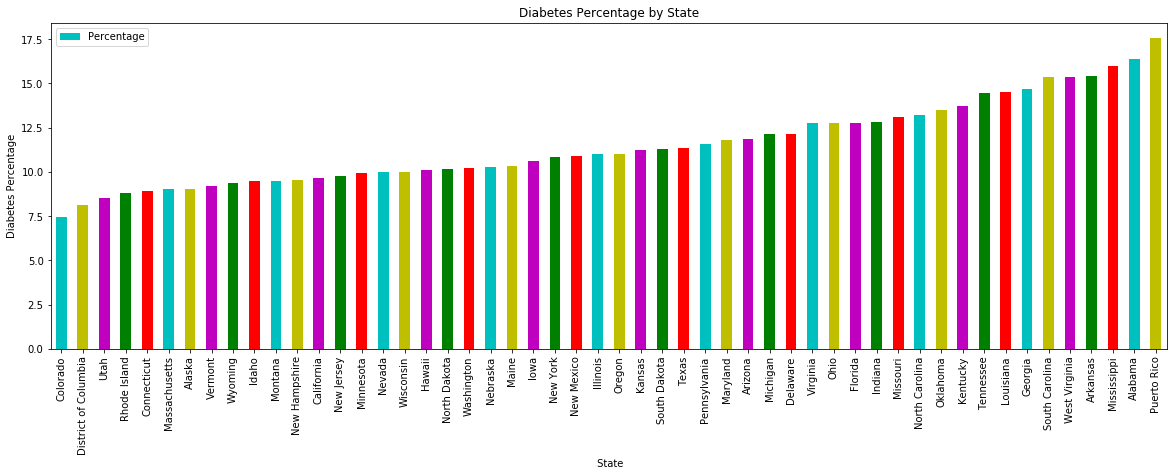

In [253]:
ax= diabetes_2016_state.plot.bar(x ='State',y='Percentage',color=['c','y','m','g','r'],figsize=(20,6))
ax.set_xlabel(" State")
ax.set_ylabel("Diabetes Percentage")
ax.set_title('Diabetes Percentage by State')
plt.savefig('./Diabetes_state.png')

In [172]:
color=['c','y','m','g','r']color=['c','y','m','g','r']color=['c','y','m','g','r']

0       11.1
1       10.7
2       17.6
3       14.5
4       17.0
        ... 
3221     8.8
3222     2.2
3223    11.3
3224    11.7
3225     9.0
Name: Percentage, Length: 3220, dtype: float64

In [173]:
df_diab2016_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3225
Data columns (total 6 columns):
County          3220 non-null object
State           3220 non-null object
CountyFIPS      3220 non-null object
Percentage      3220 non-null object
Lower Limit     3220 non-null object
 Upper Limit    3220 non-null object
dtypes: object(6)
memory usage: 176.1+ KB


In [187]:
#df_new=df.groupby(['region','year','type']).agg({'AveragePrice':'mean','Total Volume':'sum'})
df_diab2016_viz_grouped = df_diab2016_viz.groupby('State')
df_diab2016_viz_grouped.head()

County    State CountyFIPS Percentage Lower Limit  Upper Limit
0      Autauga County  Alabama      01001       11.1         7.8         15.5
1      Baldwin County  Alabama      01003       10.7           9         12.6
2      Barbour County  Alabama      01005       17.6        12.3         23.9
3         Bibb County  Alabama      01007       14.5         9.5           21
4       Blount County  Alabama      01009         17        12.7         22.2
...               ...      ...        ...        ...         ...          ...
3203    Albany County  Wyoming      56001        5.2           4          6.5
3204  Big Horn County  Wyoming      56003       13.5        10.6         16.9
3205  Campbell County  Wyoming      56005        7.5         6.1          9.3
3206    Carbon County  Wyoming      56007        7.5         5.5          9.7
3207  Converse County  Wyoming      56009        9.7         6.9         13.1

[254 rows x 6 columns]

In [15]:
median_income_2016 = pd.ExcelFile('est16all.xls')

In [16]:
median_income_2016.parse('est16ALL', skiprows= 3).head()

State FIPS Code  County FIPS Code Postal Code            Name  \
0                0                 0          US   United States   
1                1                 0          AL         Alabama   
2                1                 1          AL  Autauga County   
3                1                 3          AL  Baldwin County   
4                1                 5          AL  Barbour County   

  Poverty Estimate, All Ages 90% CI Lower Bound 90% CI Upper Bound  \
0                   44268996           44022086           44515906   
1                     814197             796927             831467   
2                       7444               6255               8633   
3                      24005              20132              27878   
4                       6787               5551               8023   

  Poverty Percent, All Ages 90% CI Lower Bound.1 90% CI Upper Bound.1  \
0                        14                 13.9                 14.1   
1                      17.2                 16.8                 17.6   
2                      13.5                 11.3                 15.7   
3                      11.7                  9.8                 13.6   
4                      29.9                 24.5                 35.3   

  Poverty Estimate, Age 0-17 90% CI Lower Bound.2 90% CI Upper Bound.2  \
0                   14115713             13976345             14255081   
1                     267674               258276               277072   
2                       2588                 2090                 3086   
3                       7881                 6231                 9531   
4                       2146                 1675                 2617   

  Poverty Percent, Age 0-17 90% CI Lower Bound.3 90% CI Upper Bound.3  \
0                      19.5                 19.3                 19.7   
1                      24.7                 23.8                 25.6   
2                      19.3                 15.6                   23   
3                      17.6                 13.9                 21.3   
4                      39.6                 30.9                 48.3   

  Poverty Estimate, Age 5-17 in Families 90% CI Lower Bound.4  \
0                                9648486              9548767   
1                                 185889               177569   
2                                   1887                 1522   
3                                   5512                 4262   
4                                   1502                 1160   

  90% CI Upper Bound.4 Poverty Percent, Age 5-17 in Families  \
0              9748205                                  18.3   
1               194209                                  23.5   
2                 2252                                  18.4   
3                 6762                                  16.6   
4                 1844                                  36.8   

  90% CI Lower Bound.5 90% CI Upper Bound.5 Median Household Income  \
0                 18.1                 18.5                   57617   
1                 22.4                 24.6                   46309   
2                 14.8                   22                   54487   
3                 12.8                 20.4                   56460   
4                 28.4                 45.2                   32884   

  90% CI Lower Bound.6 90% CI Upper Bound.6 Poverty Estimate, Age 0-4  \
0                57502                57732                   4156949   
1                45650                46968                     78675   
2                50886                58088                         .   
3                53250                59670                         .   
4                29684                36084                         .   

  90% CI Lower Bound.7 90% CI Upper Bound.7 Poverty Percent, Age 0-4  \
0              4108397              4205501                     21.3   
1                74257                83093                     

In [17]:
median_income_2016_df = median_income_2016.parse('est16ALL', skiprows= 3).loc[:, 
                                                                              ['State FIPS Code', 'County FIPS Code', 
                                                                               'Postal Code', 'Name', 'Median Household Income']]

In [18]:
median_income_2016_df.head()

State FIPS Code  County FIPS Code Postal Code            Name  \
0                0                 0          US   United States   
1                1                 0          AL         Alabama   
2                1                 1          AL  Autauga County   
3                1                 3          AL  Baldwin County   
4                1                 5          AL  Barbour County   

  Median Household Income  
0                   57617  
1                   46309  
2                   54487  
3                   56460  
4                   32884

In [19]:
median_income_2016_df['five_digit_FIPS_Code'] = median_income_2016_df['State FIPS Code'].map(lambda x: str(x).zfill(2)) + \
                                                median_income_2016_df['County FIPS Code'].map(lambda x: str(x).zfill(3))

In [20]:
median_income_2016_df.head()

State FIPS Code  County FIPS Code Postal Code            Name  \
0                0                 0          US   United States   
1                1                 0          AL         Alabama   
2                1                 1          AL  Autauga County   
3                1                 3          AL  Baldwin County   
4                1                 5          AL  Barbour County   

  Median Household Income five_digit_FIPS_Code  
0                   57617                00000  
1                   46309                01000  
2                   54487                01001  
3                   56460                01003  
4                   32884                01005

In [21]:
unemployment_2016 = pd.ExcelFile('laucnty16.xlsx')

In [22]:
unemployment_2016.parse('laucnty16', skiprows = 4).head()

Code  Code.1  Code.2 County Name/State Abbreviation    Year  \
0              NaN     NaN     NaN                            NaN     NaN   
1  CN0100100000000     1.0     1.0             Autauga County, AL  2016.0   
2  CN0100300000000     1.0     3.0             Baldwin County, AL  2016.0   
3  CN0100500000000     1.0     5.0             Barbour County, AL  2016.0   
4  CN0100700000000     1.0     7.0                Bibb County, AL  2016.0   

   Unnamed: 5    Force  Employed  Unemployed  (%)  
0         NaN      NaN       NaN         NaN  NaN  
1         NaN  25966.0   24645.0      1321.0  5.1  
2         NaN  90670.0   85839.0      4831.0  5.3  
3         NaN   8417.0    7717.0       700.0  8.3  
4         NaN   8623.0    8067.0       556.0  6.4

In [23]:
unemployment_2016_df = unemployment_2016.parse('laucnty16', skiprows = 4)

In [24]:
unemployment_2016_df = unemployment_2016_df[1:len(unemployment_2016_df)-3]

In [25]:
unemployment_2016_df.head()

Code  Code.1  Code.2 County Name/State Abbreviation    Year  \
1  CN0100100000000     1.0     1.0             Autauga County, AL  2016.0   
2  CN0100300000000     1.0     3.0             Baldwin County, AL  2016.0   
3  CN0100500000000     1.0     5.0             Barbour County, AL  2016.0   
4  CN0100700000000     1.0     7.0                Bibb County, AL  2016.0   
5  CN0100900000000     1.0     9.0              Blount County, AL  2016.0   

   Unnamed: 5    Force  Employed  Unemployed  (%)  
1         NaN  25966.0   24645.0      1321.0  5.1  
2         NaN  90670.0   85839.0      4831.0  5.3  
3         NaN   8417.0    7717.0       700.0  8.3  
4         NaN   8623.0    8067.0       556.0  6.4  
5         NaN  24623.0   23298.0      1325.0  5.4

In [26]:
# as we did for the median_income_2016_df, we need to add leading zeroes to the state code (Code.1)
# and county code (Code.2)

for col, length in {'Code.1': 2, 'Code.2': 3}.items():
    
    unemployment_2016_df[col] = unemployment_2016_df[col].map(lambda x: str(int(x)).zfill(length))

In [27]:
unemployment_2016_df

Code Code.1 Code.2 County Name/State Abbreviation    Year  \
1     CN0100100000000     01    001             Autauga County, AL  2016.0   
2     CN0100300000000     01    003             Baldwin County, AL  2016.0   
3     CN0100500000000     01    005             Barbour County, AL  2016.0   
4     CN0100700000000     01    007                Bibb County, AL  2016.0   
5     CN0100900000000     01    009              Blount County, AL  2016.0   
...               ...    ...    ...                            ...     ...   
3215  CN7214500000000     72    145        Vega Baja Municipio, PR  2016.0   
3216  CN7214700000000     72    147          Vieques Municipio, PR  2016.0   
3217  CN7214900000000     72    149         Villalba Municipio, PR  2016.0   
3218  CN7215100000000     72    151          Yabucoa Municipio, PR  2016.0   
3219  CN7215300000000     72    153            Yauco Municipio, PR  2016.0   

      Unnamed: 5    Force  Employed  Unemployed   (%)  
1            NaN  25966.0   24645.0      1321.0   5.1  
2            NaN  90670.0   85839.0      4831.0   5.3  
3            NaN   8417.0    7717.0       700.0   8.3  
4            NaN   8623.0    8067.0       556.0   6.4  
5            NaN  24623.0   23298.0      1325.0   5.4  
...          ...      ...       ...         ...   ...  
3215         NaN  13722.0   11821.0      1901.0  13.9  
3216         NaN   3257.0    2912.0       345.0  10.6  
3217         NaN   7808.0    6231.0      1577.0  20.2  
3218         NaN   9073.0    7540.0      1533.0  16.9  
3219         NaN  10726.0    8713.0      2013.0  18.8  

[3219 rows x 10 columns]

In [28]:
unemployment_2016_df['five_digit_FIPS_Code'] = unemployment_2016_df['Code.1'] + unemployment_2016_df['Code.2']

In [29]:
unemployment_2016_df.head()

Code Code.1 Code.2 County Name/State Abbreviation    Year  \
1  CN0100100000000     01    001             Autauga County, AL  2016.0   
2  CN0100300000000     01    003             Baldwin County, AL  2016.0   
3  CN0100500000000     01    005             Barbour County, AL  2016.0   
4  CN0100700000000     01    007                Bibb County, AL  2016.0   
5  CN0100900000000     01    009              Blount County, AL  2016.0   

   Unnamed: 5    Force  Employed  Unemployed  (%) five_digit_FIPS_Code  
1         NaN  25966.0   24645.0      1321.0  5.1                01001  
2         NaN  90670.0   85839.0      4831.0  5.3                01003  
3         NaN   8417.0    7717.0       700.0  8.3                01005  
4         NaN   8623.0    8067.0       556.0  6.4                01007  
5         NaN  24623.0   23298.0      1325.0  5.4                01009

## <font color=blue>Identify Relevant Features to Include<font/>##

In [30]:
df_diabetes = source_data_csv.loc[:, ["State FIPS Code", 
"County FIPS Code", 
"5-digit FIPS Code", 
"State Abbreviation", 
"Name",
"Poor or fair health raw value",
"Poor physical health days raw value",
"Poor mental health days raw value",
"Adult smoking raw value",
"Adult obesity raw value",
"Food environment index raw value",
"Physical inactivity raw value",
"Access to exercise opportunities raw value",
"Excessive drinking raw value",
"Uninsured raw value",
"Primary care physicians raw value",
"Dentists raw value",
"Mental health providers raw value",
"Some college raw value",
"Unemployment raw value",
"Children in poverty raw value",
"Income inequality raw value",
"Children in single-parent households raw value",
"Social associations raw value",
"Air pollution - particulate matter raw value",
"Severe housing problems raw value",
"Long commute - driving alone raw value",
"Life expectancy raw value",
"Food insecurity raw value",
"Limited access to healthy foods raw value",
"Insufficient sleep raw value",
"Uninsured adults raw value",
"Median household income raw value",
"Children eligible for free or reduced price lunch raw value",
"Residential segregation - non-white/white raw value",
"Severe housing cost burden raw value",
"% below 18 years of age raw value",
"% 65 and older raw value",
"% Rural raw value",
"Diabetes prevalence raw value"]]

In [31]:
print('rows vs cols:',df_diabetes.shape)
df_diabetes.head()

rows vs cols: (3195, 40)


State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Poor or fair health raw value  \
0          county                 v002_rawvalue   
1   United States                           NaN   
2         Alabama                  0.2140240566   
3  Autauga County                  0.1841112436   
4  Baldwin County                  0.1806045782   

  Poor physical health days raw value Poor mental health days raw value  \
0                       v036_rawvalue                     v042_rawvalue   
1                                 NaN                               NaN   
2                        4.4004575204                       4.577366748   
3                        4.2005779826                      4.3067392835   
4                        4.0987477691                      4.2496487805   

  Adult smoking raw value Adult obesity raw value  \
0           v009_rawvalue           v011_rawvalue   
1                     NaN                   0.285   
2             0.215381544                   0.351   
3             0.191246585                   0.375   
4            0.1679548515                    0.31   

  Food environment index raw value Physical inactivity raw value  \
0                    v133_rawvalue                 v070_rawvalue   
1                              7.7                         0.222   
2                              5.8                         0.282   
3                              7.2                         0.311   
4                                8                         0.238   

  Access to exercise opportunities raw value Excessive drinking raw value  \
0                              v132_rawvalue                v049_rawvalue   
1                               0.8389448174                          NaN   
2                               0.6164961831                 0.1417814586   
3                                0.686775027                 0.1687801512   
4                               0.7197103119                 0.1671496869   

  Uninsured raw value Primary care physicians raw value Dentists raw value  \
0       v085_rawvalue                     v004_rawvalue      v088_rawvalue   
1        0.1000885875                       0.000754309       0.0006843073   
2         0.107717996                       0.000653877       0.0004761273   
3         0.085009665                      0.0004150426        0.000324301   
4        0.1069928804                      0.0007287966       0.0004985232   

  Mental health providers raw value Some college raw value  \
0                     v062_rawvalue          v069_rawvalue   
1                      0.0022868902           0.6522563975   
2                      0.0009050726           0.5986474992   
3                      0.0001621505           0.6085466499   
4                      0.0009123916           0.6613392634   

  Unemployment raw value Children in poverty raw value  \
0          v023_rawvalue                 v024_rawvalue   
1           0.0435556876                         0.184   
2           0.0439678517                         0.244   
3           0.0386352233                         0.193   
4           0.0398833641                         0.147   

  Income inequality raw value Children in single-parent households raw value  \
0               v044_rawvalue                                  v082_rawvalue   
1                4.9414857531                                   0.3325168477   
2                 5.238579235                                   0.3810461622   
3                4.6366638778                                   0.2470009686   
4          

In [32]:
# convert variable header names using snake convention:

df_diabetes = df_diabetes.rename(columns = {"State FIPS Code" : "state_code", 
"County FIPS Code" : "county_code" , 
"5-digit FIPS Code" : "FIPS_code", 
"State Abbreviation" : "state_abr", 
"Name" : "county_name",
"Poor or fair health raw value" : "poor_fair_health",
"Poor physical health days raw value" : "poor_health_days",
"Poor mental health days raw value" : "poor_mental_health_days",
"Adult smoking raw value" : "adult_smoking",
"Adult obesity raw value" : "adult_obesity",
"Food environment index raw value" : "food_environ_index",
"Physical inactivity raw value" : "physical_inactivity",
"Access to exercise opportunities raw value" : "access_to_exercise",
"Excessive drinking raw value" : "excessive_drinking",
"Uninsured raw value" : "uninsured",
"Primary care physicians raw value" : "primary_care",
"Dentists raw value" : "dentists",
"Mental health providers raw value" : "mental_care",
"Some college raw value" : "some_college",
"Unemployment raw value" : "unemployment",
"Children in poverty raw value" : "children_in_poverty",
"Income inequality raw value" : "income_in_equality",
"Children in single-parent households raw value" : "single_parent_children",
"Social associations raw value" : "social_associations",
"Air pollution - particulate matter raw value" : "air_pollution",
"Severe housing problems raw value" : "severe_housing",
"Long commute - driving alone raw value" : "long_commute",
"Life expectancy raw value" : "life_expectancy",
"Food insecurity raw value" : "food_insecurity",
"Limited access to healthy foods raw value" : "limited_access_heatlh_food",
"Insufficient sleep raw value" : "insufficient_sleep",
"Uninsured adults raw value" : "uninsured_adults",
"Median household income raw value" : "med_hh_Income",
"Children eligible for free or reduced price lunch raw value" : "children_free_lunch",
"Residential segregation - non-white/white raw value" : "residential_segregation",
"Severe housing cost burden raw value" : "severe_housing_cost",
"% below 18 years of age raw value" : "under_18",
"% 65 and older raw value" : "over_65",
"% Rural raw value" : "rural",
"Diabetes prevalence raw value" : "diabetes_target"})

In [33]:
# remove first row as it contains useless data
df_diabetes = df_diabetes[1:]

In [34]:
# convert the county unique identifier code to string

df_diabetes['FIPS_code'] = df_diabetes['FIPS_code'].map(lambda x: str(x))

In [35]:
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x))

In [36]:
# merge the 2016 data from diabetes_2016 to the main df_diabetes dataframe

df_diabetes = df_diabetes.merge(diabetes_2016[['CountyFIPS', 'Percentage']], how = 'left', left_on = 'FIPS_code', right_on = 'CountyFIPS')

In [37]:
median_income_2016_df.five_digit_FIPS_Code = median_income_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))

In [38]:
# merge the 2016 data from median_income_2016_df to the main df_diabetes dataframe

df_diabetes = df_diabetes.merge(median_income_2016_df[['five_digit_FIPS_Code', 'Median Household Income']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')

In [39]:
unemployment_2016_df['five_digit_FIPS_Code'] = unemployment_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))

In [40]:
df_diabetes = df_diabetes.merge(unemployment_2016_df[['five_digit_FIPS_Code', '(%)']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')

In [41]:
df_diabetes.head()

state_code county_code FIPS_code state_abr     county_name poor_fair_health  \
0         00         000     00000        US   United States              NaN   
1         01         000     01000        AL         Alabama     0.2140240566   
2         01         001     01001        AL  Autauga County     0.1841112436   
3         01         003     01003        AL  Baldwin County     0.1806045782   
4         01         005     01005        AL  Barbour County     0.2577341563   

  poor_health_days poor_mental_health_days adult_smoking adult_obesity  \
0              NaN                     NaN           NaN         0.285   
1     4.4004575204             4.577366748   0.215381544         0.351   
2     4.2005779826            4.3067392835   0.191246585         0.375   
3     4.0987477691            4.2496487805  0.1679548515          0.31   
4     5.0674383044             4.634994147  0.2154087757         0.443   

  food_environ_index physical_inactivity access_to_exercise  \
0                7.7               0.222       0.8389448174   
1                5.8               0.282       0.6164961831   
2                7.2               0.311        0.686775027   
3                  8               0.238       0.7197103119   
4                5.6               0.282       0.5362566923   

  excessive_drinking     uninsured  primary_care      dentists   mental_care  \
0                NaN  0.1000885875   0.000754309  0.0006843073  0.0022868902   
1       0.1417814586   0.107717996   0.000653877  0.0004761273  0.0009050726   
2       0.1687801512   0.085009665  0.0004150426   0.000324301  0.0001621505   
3       0.1671496869  0.1069928804  0.0007287966  0.0004985232  0.0009123916   
4       0.1269871542  0.1251319664  0.0003851338  0.0003561535  0.0000791452   

   some_college  unemployment children_in_poverty income_in_equality  \
0  0.6522563975  0.0435556876               0.184       4.9414857531   
1  0.5986474992  0.0439678517               0.244        5.238579235   
2  0.6085466499  0.0386352233               0.193       4.6366638778   
3  0.6613392634  0.0398833641               0.147       4.5185596041   
4  0.3677400805  0.0590092278               0.503       5.7550626063   

  single_parent_children social_associations air_pollution severe_housing  \
0           0.3325168477        9.3003532014           NaN   0.1837308951   
1           0.3810461622        12.242715851            11   0.1491215019   
2           0.2470009686        12.631730908          11.7   0.1495464575   
3           0.2518409096        10.692212904          10.3   0.1383172525   
4           0.5721574344        8.4729443482          11.5   0.1545553145   

  long_commute life_expectancy food_insecurity limited_access_heatlh_food  \
0        0.352    79.063850411           0.129               0.0590124246   
1        0.337     75.41303499           0.165               0.0792142495   
2        0.383    76.330589011           0.134                 0.11991125   
3        0.405    78.599497656           0.123                0.054244266   
4        0.338     75.77945737           0.232               0.1073966657   

  insufficient_sleep uninsured_adults med_hh_Income children_free_lunch  \
0                NaN     0.1208028915         60336        0.5196293055   
1       0.3772095459     0.1384998828         48193        0.5174145318   
2       0.3590540606     0.1096110384         58343        0.4793166434   
3       0.3330586814     0.1357031075         56607        0.4507913116   
4       0.3856316713     0.1654223969         32490        0.7376980817   

  residential_segregation severe_housing_cost      under_18       over_65  \
0                     NaN        0.1512417878  0.2261315359  0.1561427218   
1            51.161473293        0.1291760781  0.2247240729  0.1648846597   
2             27.14756927        0.1264520575  0.2393701355  0.1511963102   
3            33.240059197        0.1279592201  0.2184848656  0.1994704366   
4             2

In [42]:
df_diabetes.county_code = df_diabetes['county_code'].map(lambda x: str(x))

In [43]:
# drop duplicate FIPS identoifier columns that were a result of merging

df_diabetes = df_diabetes.drop(['CountyFIPS', 'five_digit_FIPS_Code_x', 'five_digit_FIPS_Code_y'], axis = 1)

In [44]:
# drop 'old', historic features: deiabetes_target, med_hh_income,. 'unemployment'

df_diabetes = df_diabetes.drop(['diabetes_target', 'med_hh_Income', 'unemployment'], axis = 1)

In [45]:
# rename newly merged variables as: diabetes_target, med_hh_income,. 'unemployment'

df_diabetes = df_diabetes.rename(columns = {'Percentage': 'diabetes_target',
                              'Median Household Income': 'med_hh_Income',
                             '(%)': 'unemployment'})

In [46]:
df_diabetes.head()

state_code county_code FIPS_code state_abr     county_name poor_fair_health  \
0         00         000     00000        US   United States              NaN   
1         01         000     01000        AL         Alabama     0.2140240566   
2         01         001     01001        AL  Autauga County     0.1841112436   
3         01         003     01003        AL  Baldwin County     0.1806045782   
4         01         005     01005        AL  Barbour County     0.2577341563   

  poor_health_days poor_mental_health_days adult_smoking adult_obesity  \
0              NaN                     NaN           NaN         0.285   
1     4.4004575204             4.577366748   0.215381544         0.351   
2     4.2005779826            4.3067392835   0.191246585         0.375   
3     4.0987477691            4.2496487805  0.1679548515          0.31   
4     5.0674383044             4.634994147  0.2154087757         0.443   

  food_environ_index physical_inactivity access_to_exercise  \
0                7.7               0.222       0.8389448174   
1                5.8               0.282       0.6164961831   
2                7.2               0.311        0.686775027   
3                  8               0.238       0.7197103119   
4                5.6               0.282       0.5362566923   

  excessive_drinking     uninsured  primary_care      dentists   mental_care  \
0                NaN  0.1000885875   0.000754309  0.0006843073  0.0022868902   
1       0.1417814586   0.107717996   0.000653877  0.0004761273  0.0009050726   
2       0.1687801512   0.085009665  0.0004150426   0.000324301  0.0001621505   
3       0.1671496869  0.1069928804  0.0007287966  0.0004985232  0.0009123916   
4       0.1269871542  0.1251319664  0.0003851338  0.0003561535  0.0000791452   

   some_college children_in_poverty income_in_equality single_parent_children  \
0  0.6522563975               0.184       4.9414857531           0.3325168477   
1  0.5986474992               0.244        5.238579235           0.3810461622   
2  0.6085466499               0.193       4.6366638778           0.2470009686   
3  0.6613392634               0.147       4.5185596041           0.2518409096   
4  0.3677400805               0.503       5.7550626063           0.5721574344   

  social_associations air_pollution severe_housing long_commute  \
0        9.3003532014           NaN   0.1837308951        0.352   
1        12.242715851            11   0.1491215019        0.337   
2        12.631730908          11.7   0.1495464575        0.383   
3        10.692212904          10.3   0.1383172525        0.405   
4        8.4729443482          11.5   0.1545553145        0.338   

  life_expectancy food_insecurity limited_access_heatlh_food  \
0    79.063850411           0.129               0.0590124246   
1     75.41303499           0.165               0.0792142495   
2    76.330589011           0.134                 0.11991125   
3    78.599497656           0.123                0.054244266   
4     75.77945737           0.232               0.1073966657   

  insufficient_sleep uninsured_adults children_free_lunch  \
0                NaN     0.1208028915        0.5196293055   
1       0.3772095459     0.1384998828        0.5174145318   
2       0.3590540606     0.1096110384        0.4793166434   
3       0.3330586814     0.1357031075        0.4507913116   
4       0.3856316713     0.1654223969        0.7376980817   

  residential_segregation severe_housing_cost      under_18       over_65  \
0                     NaN        0.1512417878  0.2261315359  0.1561427218   
1            51.161473293        0.1291760781  0.2247240729  0.1648846597   
2             27.14756927        0.1264520575  0.2393701355  0.1511963102   
3            33.240059197        0.1279592201  0.2184848656  0.1994704366   
4             24.31376525        0.1358676522  0.2076375148  0.1882469331   

          rural diabetes_target med_hh_Income  unemployment  
0           NaN             NaN         576

In [47]:
# for consistentcy as the majority of features as expressed as decimals. We will convert the variables expressed as
# percentages to decimals also

for col in ['social_associations', 'residential_segregation', 'diabetes_target', 'unemployment']:
    df_diabetes[col] = df_diabetes[col].map(lambda x: float(x)/100)

## <font color=blue>EDA<font/>

###  Data Type Cleaning:

In [48]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3193
Data columns (total 40 columns):
state_code                    3194 non-null object
county_code                   3194 non-null object
FIPS_code                     3194 non-null object
state_abr                     3194 non-null object
county_name                   3194 non-null object
poor_fair_health              3193 non-null object
poor_health_days              3193 non-null object
poor_mental_health_days       3193 non-null object
adult_smoking                 3193 non-null object
adult_obesity                 3194 non-null object
food_environ_index            3175 non-null object
physical_inactivity           3194 non-null object
access_to_exercise            3188 non-null object
excessive_drinking            3193 non-null object
uninsured                     3193 non-null object
primary_care                  3059 non-null object
dentists                      3109 non-null object
mental_care               

Majority of variables are stored as strings while they are in reality float values.

Need to convert to float

In [49]:
df_diabetes_2 = df_diabetes.copy()

In [50]:
# the following loop will iterate through the dictionary conatining all the column names from our dataframe
# and convert the column contents to the specified datatype.
# for the columns that we want to convert to float we first strip any whitespace, remove cells that only contain only
# a '.' (randomly discovered within the dataframe) as these cannot be converted to floats.

for k, v in {'state_code': 'str', 
                    'county_code': 'str', 
                    'FIPS_code': 'str', 
                    'state_abr': 'str', 
                    'county_name': 'str',
                    'poor_fair_health': 'float', 
                    'poor_health_days': 'float', 
                    'poor_mental_health_days': 'float',
                    'adult_smoking': 'float', 
                    'adult_obesity': 'float', 
                    'food_environ_index': 'float',
                    'physical_inactivity': 'float', 
                    'access_to_exercise': 'float', 
                    'excessive_drinking': 'float',
                    'uninsured': 'float', 
                    'primary_care': 'float', 
                    'dentists': 'float', 
                    'mental_care': 'float', 
                    'some_college': 'float',
                    'children_in_poverty': 'float', 
                    'income_in_equality': 'float', 
                    'single_parent_children': 'float',
                    
                    'air_pollution': 'float', 
                    'severe_housing': 'float',
                    'long_commute': 'float', 
                    'life_expectancy': 'float', 
                    'food_insecurity': 'float',
                    'limited_access_heatlh_food': 'float', 
                    'insufficient_sleep': 'float', 
                    'uninsured_adults': 'float',
                    'children_free_lunch': 'float', 
                    
                    'severe_housing_cost': 'float',
                    'under_18': 'float', 
                    'over_65': 'float', 
                    'rural': 'float', 
                    
                    'med_hh_Income': 'float'}.items():
    
    if v == 'str':
        df_diabetes_2[k].astype(v)
    else:
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: str(x).strip())
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: 0 if x == '.' else x)
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: float(x))

In [51]:
df_diabetes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3193
Data columns (total 40 columns):
state_code                    3194 non-null object
county_code                   3194 non-null object
FIPS_code                     3194 non-null object
state_abr                     3194 non-null object
county_name                   3194 non-null object
poor_fair_health              3193 non-null float64
poor_health_days              3193 non-null float64
poor_mental_health_days       3193 non-null float64
adult_smoking                 3193 non-null float64
adult_obesity                 3194 non-null float64
food_environ_index            3175 non-null float64
physical_inactivity           3194 non-null float64
access_to_exercise            3188 non-null float64
excessive_drinking            3193 non-null float64
uninsured                     3193 non-null float64
primary_care                  3059 non-null float64
dentists                      3109 non-null float64
mental_care   

All features are now of correct type

In [52]:
# for the purpose of imputing any missing values that may exist at county level we will use the state averages
# separate all state level rows into a dataframe:

df_diabetes_state = df_diabetes_2[(df_diabetes_2['county_code'] == '000') | (df_diabetes_2['county_code'] == '0')]

df_diabetes_state = df_diabetes_state[(df_diabetes_state['state_code'] != '00')]

df_diabetes_state.head()

state_code county_code FIPS_code state_abr county_name  poor_fair_health  \
1           01         000     01000        AL     Alabama          0.214024   
69          02         000     02000        AK      Alaska          0.134379   
99          04         000     04000        AZ     Arizona          0.177577   
115         05         000     05000        AR    Arkansas          0.244723   
191         06         000     06000        CA  California          0.175266   

     poor_health_days  poor_mental_health_days  adult_smoking  adult_obesity  \
1            4.400458                 4.577367       0.215382          0.351   
69           3.791886                 3.375639       0.190354          0.304   
99           4.025404                 3.870811       0.147148          0.272   
115          5.009084                 5.188873       0.235849          0.352   
191          3.510769                 3.537173       0.109729          0.227   

     food_environ_index  physical_inactivity  access_to_exercise  \
1                   5.8                0.282            0.616496   
69                  6.5                0.188            0.822380   
99                  6.5                0.202            0.857684   
115                 5.4                0.312            0.645706   
191                 8.9                0.174            0.929476   

     excessive_drinking  uninsured  primary_care  dentists  mental_care  \
1              0.141781   0.107718      0.000654  0.000476     0.000905   
69             0.191250   0.155173      0.000899  0.000987     0.003809   
99             0.172814   0.119330      0.000651  0.000613     0.001266   
115            0.159217   0.094064      0.000665  0.000458     0.002161   
191            0.178126   0.083799      0.000785  0.000834     0.003278   

     some_college  children_in_poverty  income_in_equality  \
1        0.598647                0.244            5.238579   
69       0.655423                0.145            4.030995   
99       0.630945                0.210            4.646713   
115      0.573331                0.225            4.786303   
191      0.642214                0.181            5.254963   

     single_parent_children  social_associations  air_pollution  \
1                  0.381046             0.122427           11.0   
69                 0.297543             0.113089            NaN   
99                 0.357180             0.055677            5.8   
115                0.357446             0.120807           10.0   
191                0.314436             0.058257            9.5   

     severe_housing  long_commute  life_expectancy  food_insecurity  \
1          0.149122         0.337        75.413035            0.165   
69         0.207296         0.160        78.486879            0.134   
99         0.189627         0.350        79.927117            0.149   
115        0.145291         0.264        75.830337            0.172   
191        0.273372         0.403        81.496605            0.117   

     limited_access_heatlh_food  insufficient_sleep  uninsured_adults  \
1                      0.079214            0.377210          0.138500   
69                     0.091512            0.318853          0.176358   
99                     0.075438            0.327912          0.137756   
115                    0.087441            0.343454          0.116249   
191                    0.032908            0.344645          0.104037   

     children_free_lunch  residential_segregation  severe_housing_cost  \
1               0.517415                 0.511615             0.129176   
69              0.440528                 0.430925             0.122965   
99              0.570477                 0.374602             0.146547   
115             0.345906                 0.512923             0.117883   
191             0.581136                 0.377343             0.205352   

     under_18   over_65     rural  diabetes_target  med_hh_Income  \
1    0.224724  0.164885  0

In [53]:
# remove all non-county level rows from the original dataset

df_diabetes_county = df_diabetes_2[df_diabetes_2['county_code'] != '000']

df_diabetes_county = df_diabetes_county[df_diabetes_county['county_code'] != '0']

In [54]:
print(df_diabetes_county.shape)
df_diabetes_county.head()

(3142, 40)


state_code county_code FIPS_code state_abr     county_name  \
2         01         001     01001        AL  Autauga County   
3         01         003     01003        AL  Baldwin County   
4         01         005     01005        AL  Barbour County   
5         01         007     01007        AL     Bibb County   
6         01         009     01009        AL   Blount County   

   poor_fair_health  poor_health_days  poor_mental_health_days  adult_smoking  \
2          0.184111          4.200578                 4.306739       0.191247   
3          0.180605          4.098748                 4.249649       0.167955   
4          0.257734          5.067438                 4.634994       0.215409   
5          0.199969          4.363377                 4.315710       0.199164   
6          0.210953          4.512753                 4.701599       0.196522   

   adult_obesity  food_environ_index  physical_inactivity  access_to_exercise  \
2          0.375                 7.2                0.311            0.686775   
3          0.310                 8.0                0.238            0.719710   
4          0.443                 5.6                0.282            0.536257   
5          0.378                 7.6                0.349            0.162514   
6          0.344                 8.5                0.285            0.229493   

   excessive_drinking  uninsured  primary_care  dentists  mental_care  \
2            0.168780   0.085010      0.000415  0.000324     0.000162   
3            0.167150   0.106993      0.000729  0.000499     0.000912   
4            0.126987   0.125132      0.000385  0.000356     0.000079   
5            0.159252   0.096801      0.000574  0.000265     0.000088   
6            0.153787   0.121140      0.000225  0.000207     0.000103   

   some_college  children_in_poverty  income_in_equality  \
2      0.608547                0.193            4.636664   
3      0.661339                0.147            4.518560   
4      0.367740                0.503            5.755063   
5      0.484063                0.273            4.254594   
6      0.544140                0.185            4.126883   

   single_parent_children  social_associations  air_pollution  severe_housing  \
2                0.247001             0.126317           11.7        0.149546   
3                0.251841             0.106922           10.3        0.138317   
4                0.572157             0.084729           11.5        0.154555   
5                0.295654             0.101577           11.2        0.109609   
6                0.295697             0.090115           11.7        0.104012   

   long_commute  life_expectancy  food_insecurity  limited_access_heatlh_food  \
2         0.383        76.330589            0.134                    0.119911   
3         0.405        78.599498            0.123                    0.054244   
4         0.338        75.779457            0.232                    0.107397   
5         0.486        73.928271            0.158                    0.026016   
6         0.597        74.597767            0.110                    0.028801   

   insufficient_sleep  uninsured_adults  children_free_lunch  \
2            0.359054          0.109611             0.479317   
3            0.333059          0.135703             0.450791   
4            0.385632          0.165422             0.737698   
5            0.381489          0.122973             0.653297   
6            0.359450          0.155646             0.533118   

   residential_segregation  severe_housing_cost  under_18   over_65     rural  \
2                 0.271476             0.126452  0.239370  0.151196  0.420022   
3                 0.332401             0.127959  0.218485  0.199470  0.422791   
4                 0.243138             0.135868  0.207638  0.188247  0.677896   
5                 0.384994             0.087339  0.206061  0.160226  0.683526   
6                 0.212058             0.081945  0.233499  0.178426  0.899515  

###  Identify and Handle Missing Values:

In [55]:
# identify columns with missing values

for col in df_diabetes_county.columns:
    if sum(df_diabetes[col].isna()) > 0:
        print(col, sum(df_diabetes[col].isna()))

poor_fair_health 1
poor_health_days 1
poor_mental_health_days 1
adult_smoking 1
food_environ_index 19
access_to_exercise 6
excessive_drinking 1
uninsured 1
primary_care 135
dentists 85
mental_care 252
children_in_poverty 1
single_parent_children 1
air_pollution 37
life_expectancy 69
limited_access_heatlh_food 19
insufficient_sleep 1
uninsured_adults 1
children_free_lunch 125
residential_segregation 348
severe_housing_cost 1
rural 8
diabetes_target 52
unemployment 53


In [56]:
# we are treating NaN and 0.0 as 'missing' values
# the following loop will identify all rows with NaN or 0.0 as a value and append that row 
# to the 'missing_value_rows' dataframe

missing_value_rows = pd.DataFrame([])

for col in df_diabetes_county.columns:
    if df_diabetes_county[df_diabetes_county[col].isna() == True].empty == False or \
        df_diabetes_county[col].loc[df_diabetes_county[col] == 0.0].empty == False:
        
        missing_value_rows = missing_value_rows.append(df_diabetes_county[(df_diabetes_county[col].isna() == True) | \
                                                       (df_diabetes_county[col] == 0.0)])
        
        missing_value_rows = missing_value_rows.drop_duplicates(keep = 'first')

In [57]:
missing_value_rows.shape

(710, 40)

there are 710 rows that have an NaN or 0.0 in at least one variable.

In [58]:
# this loop will return the actual row index number for all the rows in the 'missing_value_rows' dataframe

ind = {}
for col in missing_value_rows.columns:
    
    if df_diabetes_county[df_diabetes_county[col].isna() == True].empty == False or \
        df_diabetes_county[col].loc[df_diabetes_county[col] == 0.0].empty == False:
        
        ind[col] = df_diabetes_county[(df_diabetes_county[col].isna() == True) | \
                                 (df_diabetes_county[col] == 0.0)].index.tolist()
    
# a dictionary with the key as the variable name and values as the corresponding rows (index number) that have an NaN/0.0
# under that variable will be returned

In [59]:
ind.keys()

dict_keys(['food_environ_index', 'access_to_exercise', 'uninsured', 'primary_care', 'dentists', 'mental_care', 'children_in_poverty', 'single_parent_children', 'social_associations', 'air_pollution', 'long_commute', 'life_expectancy', 'limited_access_heatlh_food', 'uninsured_adults', 'children_free_lunch', 'residential_segregation', 'severe_housing_cost', 'under_18', 'rural', 'med_hh_Income', 'unemployment'])

In [60]:
ind['food_environ_index'][:4]

[552, 627, 770, 793]

as an example, the above tells us that for the variable **`food_environ_index`** rows 552, 627, 770, 793 are NaN or 0.0

In [61]:
df_diabetes_state.state_code = df_diabetes_state.state_code.map(lambda x: str(x))

In [62]:
# This loop will iterate though the dictionary 'ind' and for each variable, obtain the state code from the 
# 'missing_value_rows' dataframe and use that as a lookup value to obtain the state level value from the
# 'df_diabetes_state' dataframe for the specific variable name

for variable_name, row_index_list in ind.items():
    
    if type(row_index_list) == list:
        for row_index in row_index_list:

            state = missing_value_rows.loc[int(row_index),:]['state_code']
            
            if df_diabetes_state[df_diabetes_state['state_code'] == state][variable_name].empty == True:
                missing_value_rows.loc[row_index,[variable_name]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][variable_name].values[0]
            else:
                missing_value_rows.loc[row_index,[variable_name]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][variable_name].values[0]
    else:
        state = missing_value_rows.loc[int(row_index_list),:]['state_code']
        
        missing_value_rows.loc[row_index_list,[variable_name]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][variable_name].values[0]

In [63]:
missing_value_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 552 to 3000
Data columns (total 40 columns):
state_code                    710 non-null object
county_code                   710 non-null object
FIPS_code                     710 non-null object
state_abr                     710 non-null object
county_name                   710 non-null object
poor_fair_health              710 non-null float64
poor_health_days              710 non-null float64
poor_mental_health_days       710 non-null float64
adult_smoking                 710 non-null float64
adult_obesity                 710 non-null float64
food_environ_index            710 non-null float64
physical_inactivity           710 non-null float64
access_to_exercise            710 non-null float64
excessive_drinking            710 non-null float64
uninsured                     710 non-null float64
primary_care                  710 non-null float64
dentists                      710 non-null float64
mental_care                   

all NaNs have been filled except for **`air_pollution`** and **`children_free_lunch`**
This will be because there is no data for them at a state level either.

In this case we will calculate the mean of the counties within their respective state manually and imppute thise values

In [64]:
missing_value_rows_v2 = pd.DataFrame([])

for col in missing_value_rows.columns:
    if missing_value_rows[missing_value_rows[col].isna() == True].empty == False or \
        missing_value_rows[col].loc[missing_value_rows[col] == 0.0].empty == False:
        
        missing_value_rows_v2 = missing_value_rows_v2.append(missing_value_rows[(missing_value_rows[col].isna() == True) | \
                                                                                (missing_value_rows[col] == 0.0)])
        
        missing_value_rows_v2 = missing_value_rows_v2.drop_duplicates(keep = 'first')

In [65]:
print(missing_value_rows_v2.loc[:,['air_pollution','children_free_lunch']].head())
print(missing_value_rows_v2.loc[:,['air_pollution','children_free_lunch']].tail())

    air_pollution  children_free_lunch
79            NaN             0.581560
84            NaN             0.972125
90            NaN             0.520000
91            NaN             0.658903
93            NaN             0.022727
      air_pollution  children_free_lunch
2562            9.7                  NaN
2563           10.6                  NaN
2564            9.5                  NaN
2565           11.0                  NaN
2566           11.1                  NaN


In [66]:
state_medians = df_diabetes_county.groupby('state_code').median(skipna=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [67]:
state_medians.index = state_medians.index.map(lambda x: str(x))

In [68]:
state_medians.index

Index(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
       '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '01', '02',
       '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17',
       '18', '19', '20', '21'],
      dtype='object', name='state_code')

In [69]:
ind = {}
for col in missing_value_rows_v2.columns:
    
    if missing_value_rows_v2[missing_value_rows_v2[col].isna() == True].empty == False:
        
        ind[col] = missing_value_rows_v2[missing_value_rows_v2[col].isna() == True].index.tolist()

In [70]:
ind.keys()

dict_keys(['air_pollution', 'children_free_lunch', 'unemployment'])

In [71]:
ind['air_pollution'][:4]

[79, 84, 90, 91]

In [72]:
for variable_name, row_index_list in ind.items():
    
    if type(row_index_list) == list:
        for row_index in row_index_list:

            state = missing_value_rows_v2.loc[int(row_index),:]['state_code']
            
            missing_value_rows_v2.loc[row_index,[variable_name]] = state_medians.loc[str(state)][variable_name]
    else:
        state = test_3.loc[int(row_index_list),:]['state_code']
        
        missing_value_rows_v2.loc[row_index_list,[variable_name]] = state_medians.loc[str(state)][variable_name]

In [73]:
missing_value_rows_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 79 to 2566
Data columns (total 40 columns):
state_code                    147 non-null object
county_code                   147 non-null object
FIPS_code                     147 non-null object
state_abr                     147 non-null object
county_name                   147 non-null object
poor_fair_health              147 non-null float64
poor_health_days              147 non-null float64
poor_mental_health_days       147 non-null float64
adult_smoking                 147 non-null float64
adult_obesity                 147 non-null float64
food_environ_index            147 non-null float64
physical_inactivity           147 non-null float64
access_to_exercise            147 non-null float64
excessive_drinking            147 non-null float64
uninsured                     147 non-null float64
primary_care                  147 non-null float64
dentists                      147 non-null float64
mental_care                   1

**`children_free_lunch`** and **`air_pollution`** still have missing values but this will be because **ALL** counties from within a number of states will have no values for these variables and thus no median could be calculated.

In [74]:
missing_value_rows.loc[missing_value_rows.index.isin(missing_value_rows_v2.index)] = \
                            missing_value_rows_v2.loc[missing_value_rows_v2.index.isin(missing_value_rows_v2.index)]

In [75]:
missing_value_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 552 to 3000
Data columns (total 40 columns):
state_code                    710 non-null object
county_code                   710 non-null object
FIPS_code                     710 non-null object
state_abr                     710 non-null object
county_name                   710 non-null object
poor_fair_health              710 non-null float64
poor_health_days              710 non-null float64
poor_mental_health_days       710 non-null float64
adult_smoking                 710 non-null float64
adult_obesity                 710 non-null float64
food_environ_index            710 non-null float64
physical_inactivity           710 non-null float64
access_to_exercise            710 non-null float64
excessive_drinking            710 non-null float64
uninsured                     710 non-null float64
primary_care                  710 non-null float64
dentists                      710 non-null float64
mental_care                   

In [76]:
df_diabetes_county.loc[df_diabetes_county.index.isin(missing_value_rows.index)] = missing_value_rows.loc[missing_value_rows.index.isin(missing_value_rows.index)]

In [77]:
df_diabetes_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 2 to 3193
Data columns (total 40 columns):
state_code                    3142 non-null object
county_code                   3142 non-null object
FIPS_code                     3142 non-null object
state_abr                     3142 non-null object
county_name                   3142 non-null object
poor_fair_health              3142 non-null float64
poor_health_days              3142 non-null float64
poor_mental_health_days       3142 non-null float64
adult_smoking                 3142 non-null float64
adult_obesity                 3142 non-null float64
food_environ_index            3142 non-null float64
physical_inactivity           3142 non-null float64
access_to_exercise            3142 non-null float64
excessive_drinking            3142 non-null float64
uninsured                     3142 non-null float64
primary_care                  3142 non-null float64
dentists                      3142 non-null float64
mental_care   

In [78]:
# drop all non essential identifier columns

df_diabetes_county_2 = df_diabetes_county.drop(['state_code', 'county_code', 'state_abr', 'county_name'], axis = 1)

In [79]:
df_diabetes_county_2.shape

(3142, 36)

In [80]:
# for air_pollution and children_free_lunch where there are still remaining missing values we will impute a placeholder
# value

df_diabetes_county_2['air_pollution'].describe()

count    3108.000000
mean        9.020463
std         1.966774
min         3.000000
25%         7.700000
50%         9.400000
75%        10.400000
max        19.700000
Name: air_pollution, dtype: float64

In [81]:
# air_pollution - placeholder value = 25 (slightly above the max value of 19, not too high as to skew the
# variable data distrbution)

df_diabetes_county_2['air_pollution'] = df_diabetes_county_2['air_pollution'].map(lambda x: 25 if math.isnan(x) == True else x)

In [82]:
df_diabetes_county_2['air_pollution'].describe()

count    3142.000000
mean        9.193380
std         2.561333
min         3.000000
25%         7.800000
50%         9.400000
75%        10.400000
max        25.000000
Name: air_pollution, dtype: float64

In [83]:
df_diabetes_county_2['children_free_lunch'].describe()

count    3029.000000
mean        0.536078
std         0.182662
min         0.013746
25%         0.411645
50%         0.521137
75%         0.637348
max         1.000000
Name: children_free_lunch, dtype: float64

In [84]:
# air_pollution - placeholder value = mean of children_free_lunch. could not use a +1.0 value as 1.0 represents
# 100% and can't obviosuly go beyond 100%

df_diabetes_county_2['children_free_lunch'] = df_diabetes_county_2['children_free_lunch'].map(lambda x: 0.536078 if math.isnan(x) == True else x)

In [137]:
df_diabetes_county_2.head()

FIPS_code  poor_fair_health  poor_health_days  poor_mental_health_days  \
2     01001          0.184111          4.200578                 4.306739   
3     01003          0.180605          4.098748                 4.249649   
4     01005          0.257734          5.067438                 4.634994   
5     01007          0.199969          4.363377                 4.315710   
6     01009          0.210953          4.512753                 4.701599   

   adult_smoking  adult_obesity  food_environ_index  physical_inactivity  \
2       0.191247          0.375                 7.2                0.311   
3       0.167955          0.310                 8.0                0.238   
4       0.215409          0.443                 5.6                0.282   
5       0.199164          0.378                 7.6                0.349   
6       0.196522          0.344                 8.5                0.285   

   access_to_exercise  excessive_drinking  uninsured  primary_care  dentists  \
2            0.686775            0.168780   0.085010      0.000415  0.000324   
3            0.719710            0.167150   0.106993      0.000729  0.000499   
4            0.536257            0.126987   0.125132      0.000385  0.000356   
5            0.162514            0.159252   0.096801      0.000574  0.000265   
6            0.229493            0.153787   0.121140      0.000225  0.000207   

   mental_care  some_college  children_in_poverty  income_in_equality  \
2     0.000162      0.608547                0.193            4.636664   
3     0.000912      0.661339                0.147            4.518560   
4     0.000079      0.367740                0.503            5.755063   
5     0.000088      0.484063                0.273            4.254594   
6     0.000103      0.544140                0.185            4.126883   

   single_parent_children  social_associations  air_pollution  severe_housing  \
2                0.247001             0.126317           11.7        0.149546   
3                0.251841             0.106922           10.3        0.138317   
4                0.572157             0.084729           11.5        0.154555   
5                0.295654             0.101577           11.2        0.109609   
6                0.295697             0.090115           11.7        0.104012   

   long_commute  life_expectancy  food_insecurity  limited_access_heatlh_food  \
2         0.383        76.330589            0.134                    0.119911   
3         0.405        78.599498            0.123                    0.054244   
4         0.338        75.779457            0.232                    0.107397   
5         0.486        73.928271            0.158                    0.026016   
6         0.597        74.597767            0.110                    0.028801   

   insufficient_sleep  uninsured_adults  children_free_lunch  \
2            0.359054          0.109611             0.479317   
3            0.333059          0.135703             0.450791   
4            0.385632          0.165422             0.737698   
5            0.381489          0.122973             0.653297   
6            0.359450          0.155646             0.533118   

   residential_segregation  severe_housing_cost  under_18   over_65     rural  \
2                 0.271476             0.126452  0.239370  0.151196  0.420022   
3                 0.332401             0.127959  0.218485  0.199470  0.422791   
4                 0.243138             0.135868  0.207638  0.188247  0.677896   
5                 0.384994             0.087339  0.206061  0.160226  0.683526   
6                 0.212058             0.081945  0.233499  0.178426  0.899515   

   diabetes_target  med_hh_Income  unemployment  
2            0.111        54487.0         0.051  
3            0.107        56460.0         0.053  
4            0.176        32884.0         0.083  
5            0.145        43079.0         0.064  
6            0.170        47213.0         0.054

###  Inspect Variable Distributions

In [85]:
df_diabetes_county_2.shape

(3142, 36)

(6, 6)


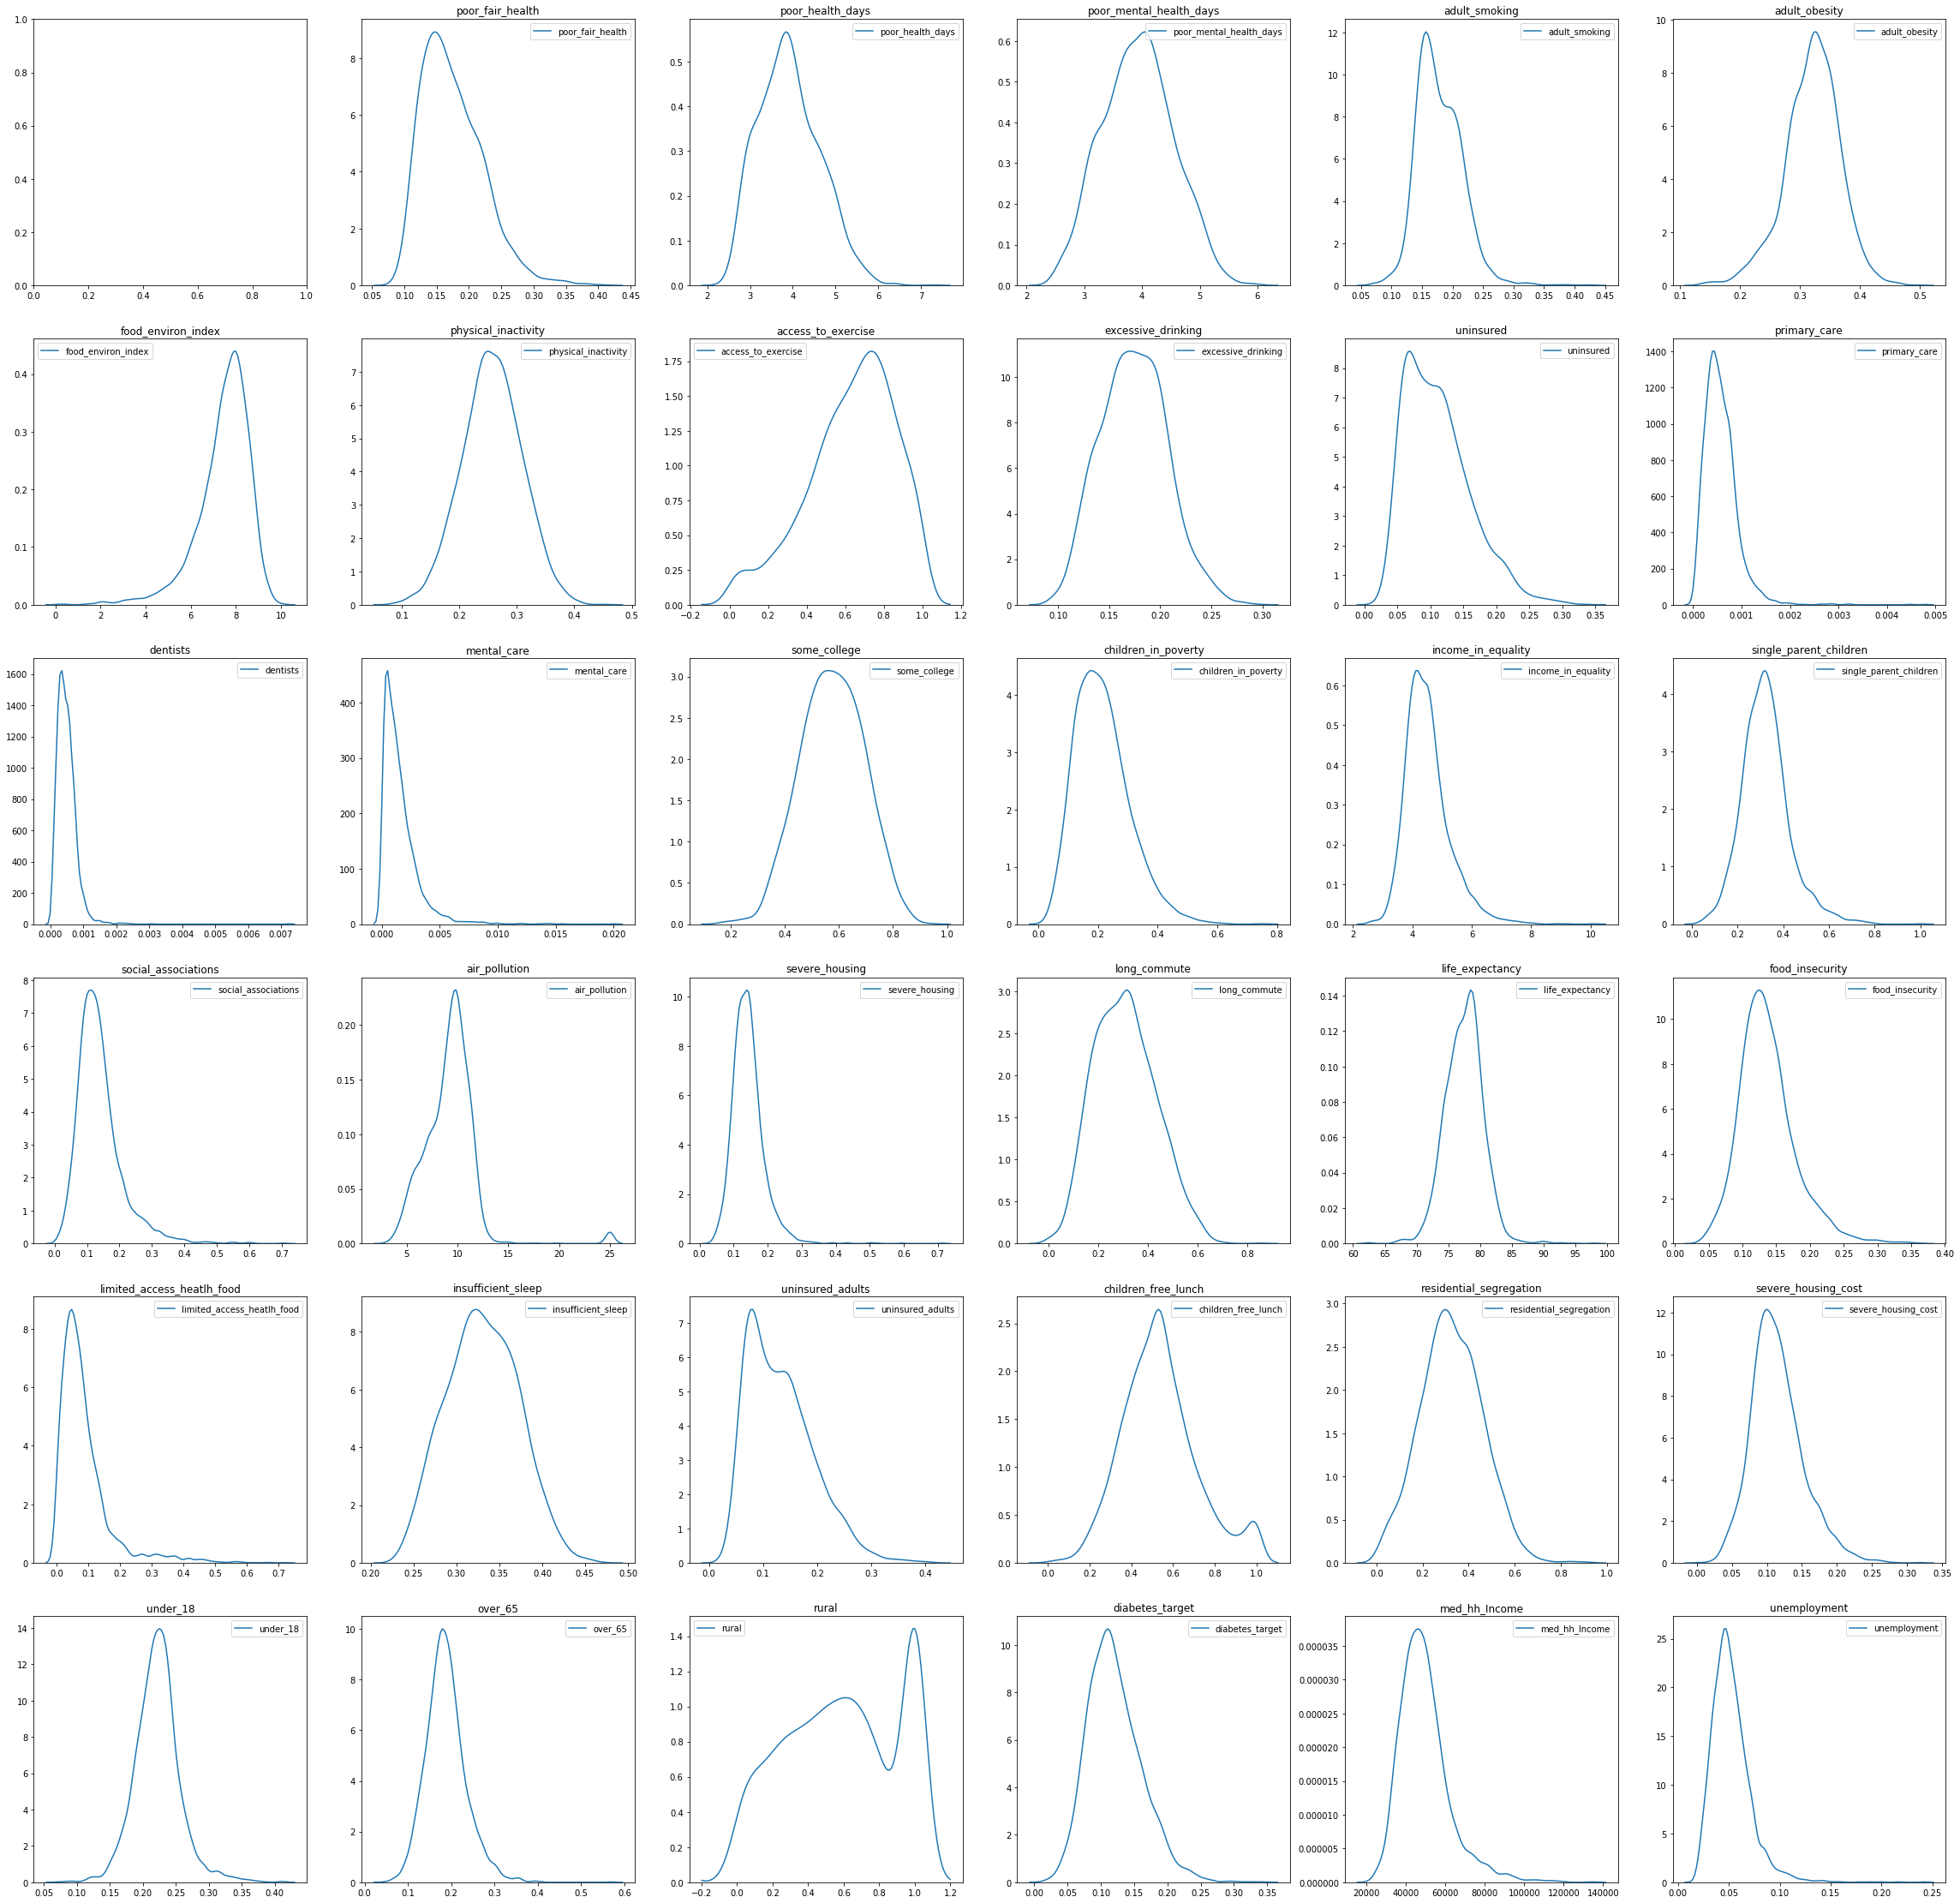

In [86]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes_county_2.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    sns.kdeplot(df_diabetes_county_2[i], ax = ax)
    ax.set_title('{}'.format(i));

In [87]:
from scipy.stats import normaltest

In [88]:
for col in df_diabetes_county_2.columns:
    
    if df_diabetes_county_2[col].dtype == 'float':
        
        if normaltest(df_diabetes_county_2[col]).pvalue > 0.05:
    
            print(col,':', normaltest(df_diabetes_county_2[col]).pvalue)
    

physical_inactivity : 0.5656976358723753


All but one variable **`Physical_inactivity`** are non-normally distributed but upon inspection of the distribution plots we can see that most are 'close' to normally distributed.

As an added step we will apply a log transformation to see if the skewness can be reduced and the variables brought closer to normal distribution

In [89]:
df_diabetes_logged = df_diabetes_county_2.copy()

for col in [x for x in df_diabetes_logged.columns if x not in ['FIPS_code', 'physical_inactivity']]:
    
    if col != 'rural':
    
        df_diabetes_logged[col] = np.log(df_diabetes_logged[col])
        
    else:
        # rural ranges from contains negative values and it is not possible to apply log to -ive numbers
        # therefore we add 10 to every value to shift into +ive and then apply log.
        df_diabetes_logged[col] = np.log(df_diabetes_logged[col]+10) 


(6, 6)


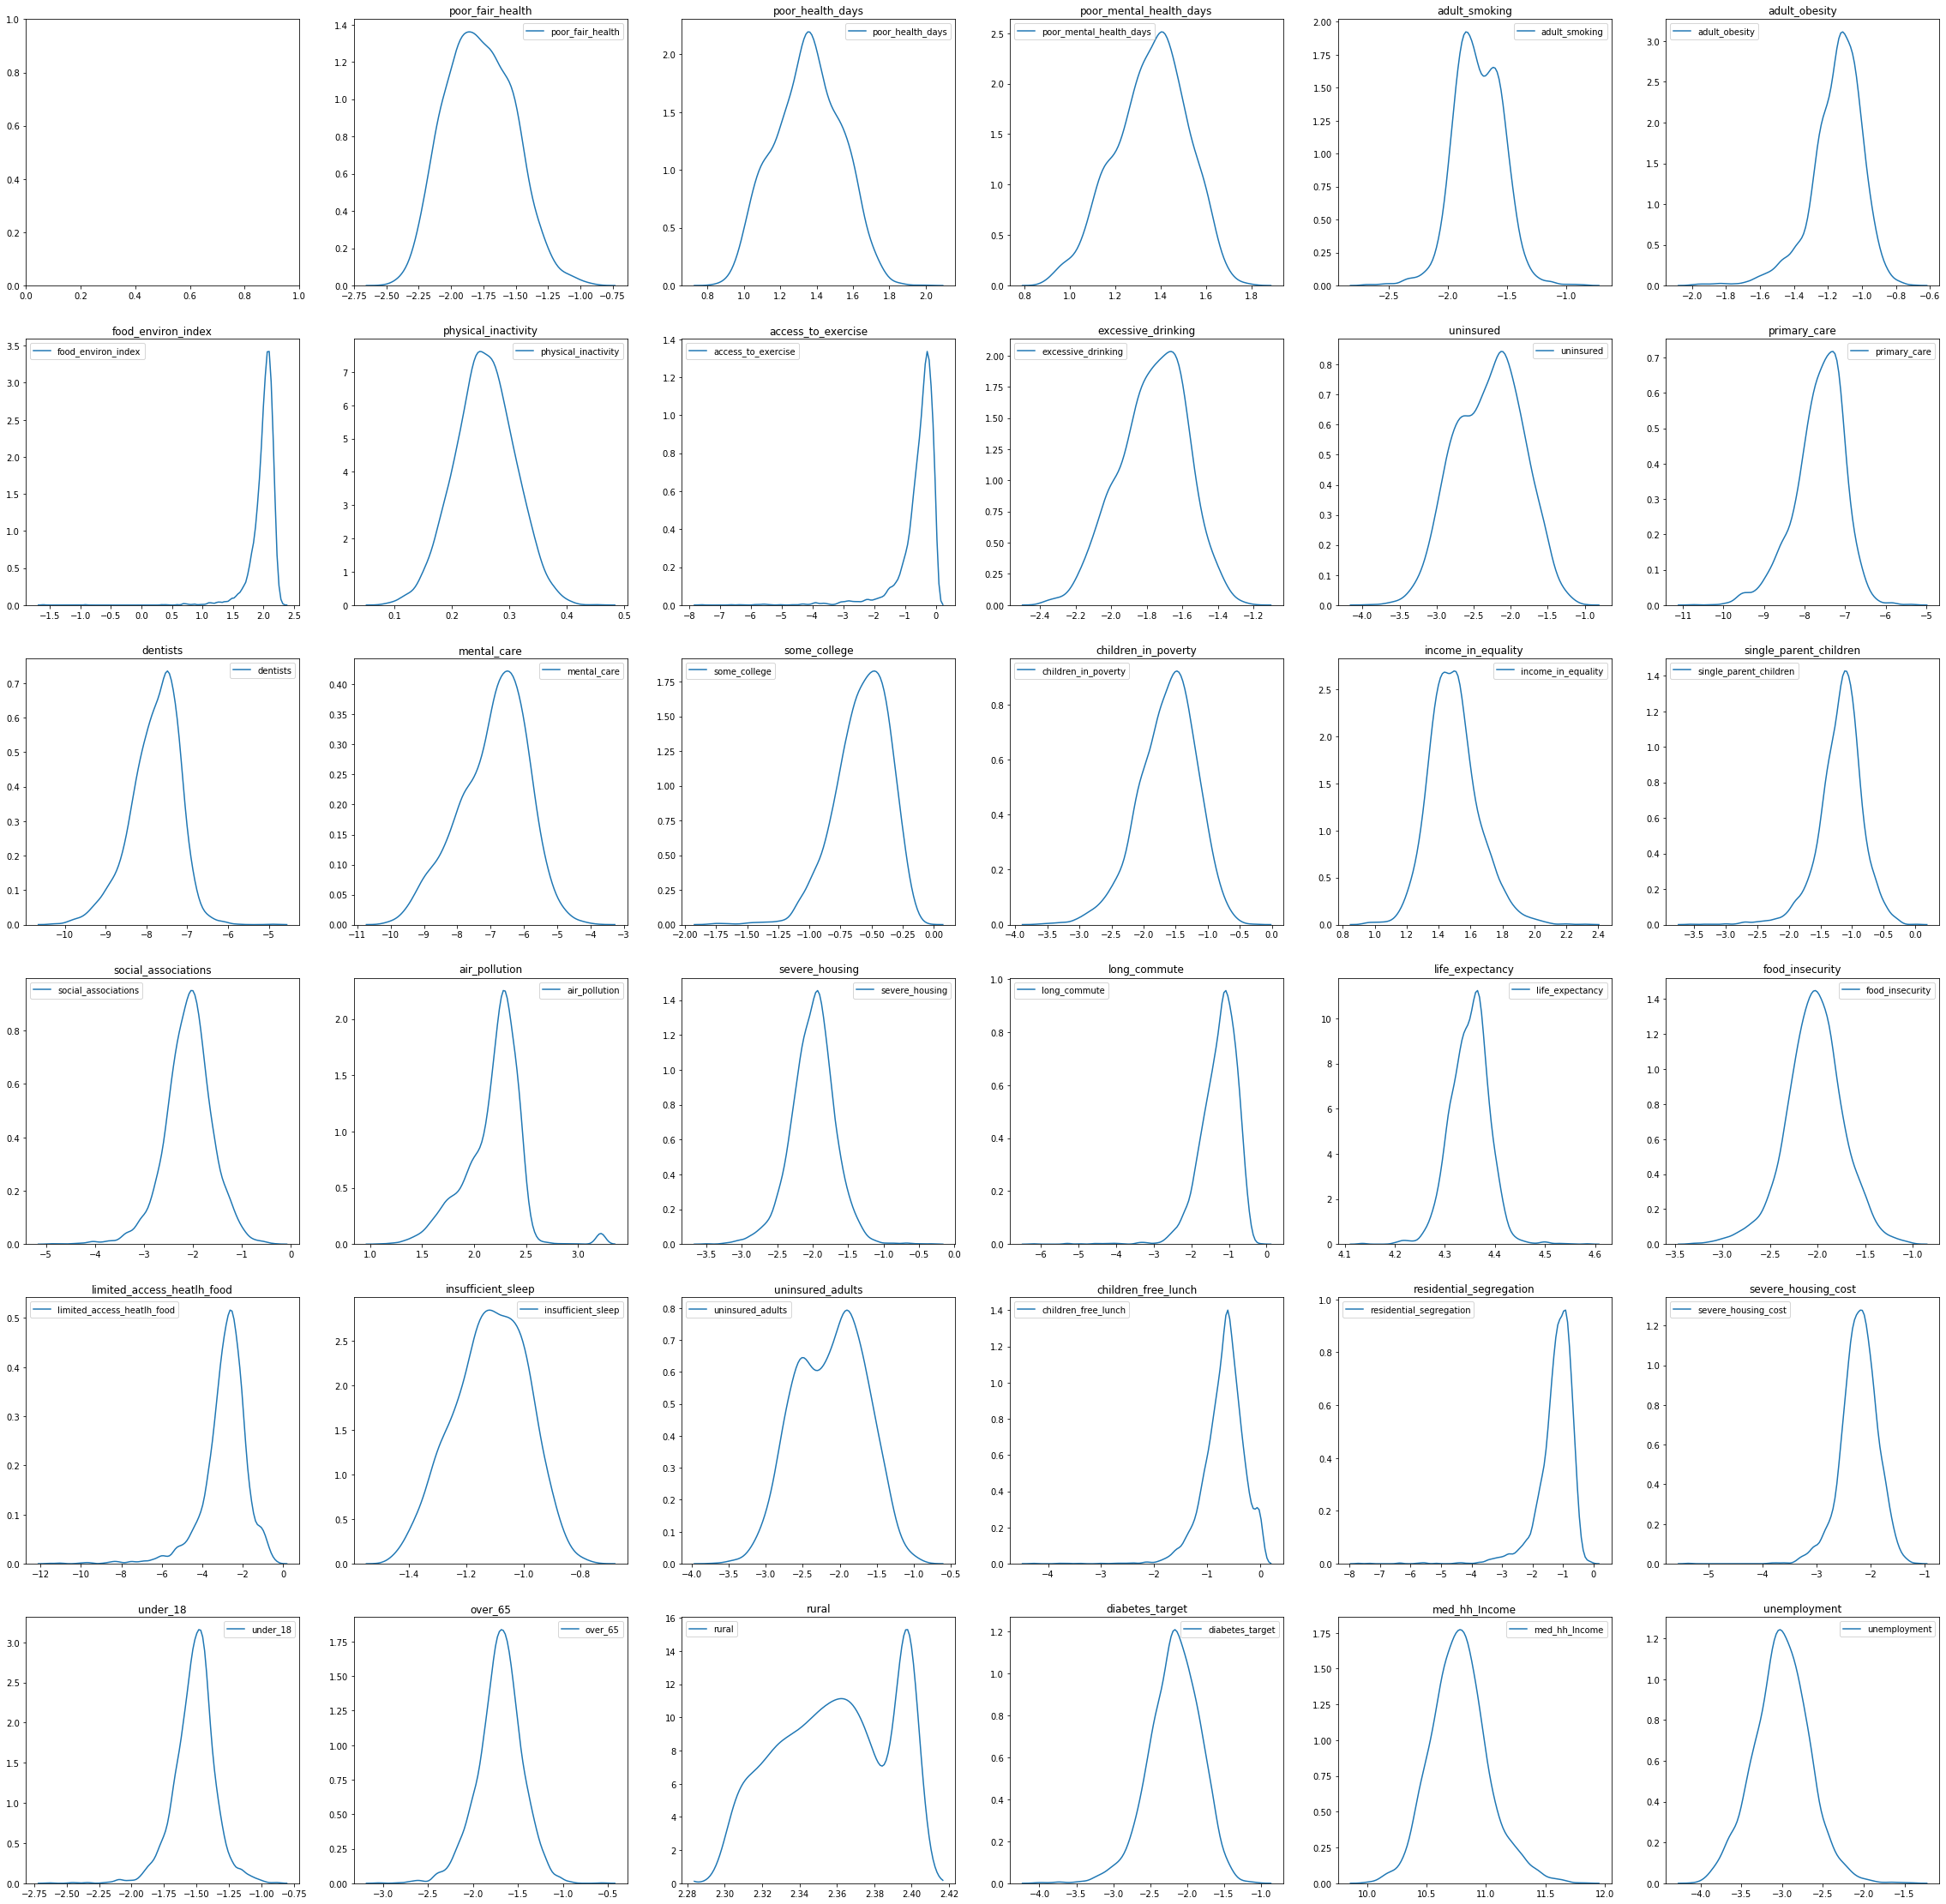

In [90]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes_logged.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    sns.kdeplot(df_diabetes_logged[i], ax = ax)
    ax.set_title('{}'.format(i));

In [91]:
for col in df_diabetes_logged.columns:
    
    if df_diabetes_logged[col].dtype == 'float':
        
        if normaltest(df_diabetes_logged[col]).pvalue > 0.05:
    
            print(col,':', normaltest(df_diabetes_logged[col]).pvalue)

physical_inactivity : 0.5656976358723753


No real improvement has occurred except that the skewness has been decreased for a number of variables but not enough to bring them into a state of normality.

Nonetheless, we will use the logged variables henceforth

### Check for Multicollinearity

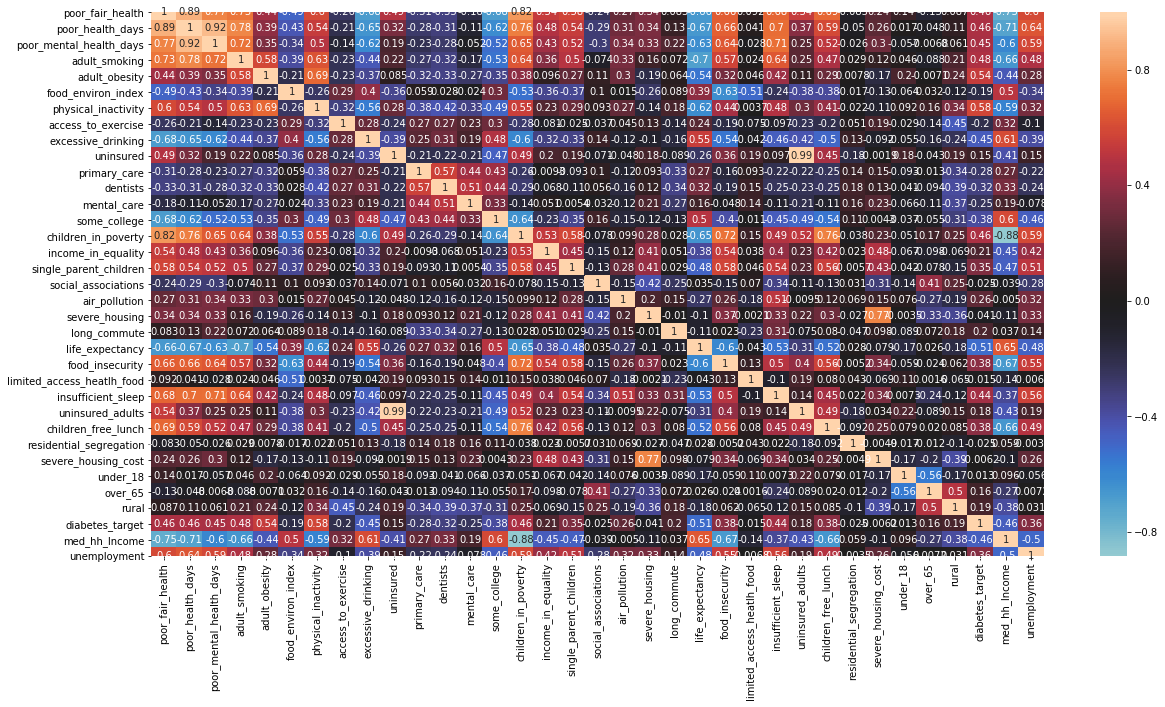

In [92]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_logged.corr(), center=0, annot=True);

high correlation between certain variable pairs with some variables showing high correlation with multiplie other variables

In [93]:
cols_to_remove = ['uninsured_adults',
'severe_housing_cost',
'med_hh_Income',
'life_expectancy',
'some_college',
'poor_fair_health',
'poor_health_days',
'poor_mental_health_days',
'children_free_lunch',
'adult_obesity',
'food_environ_index']

In [94]:
df_diabetes_logged_stripped = df_diabetes_logged.loc[:, [col for col in df_diabetes_logged.columns if col not in cols_to_remove]]

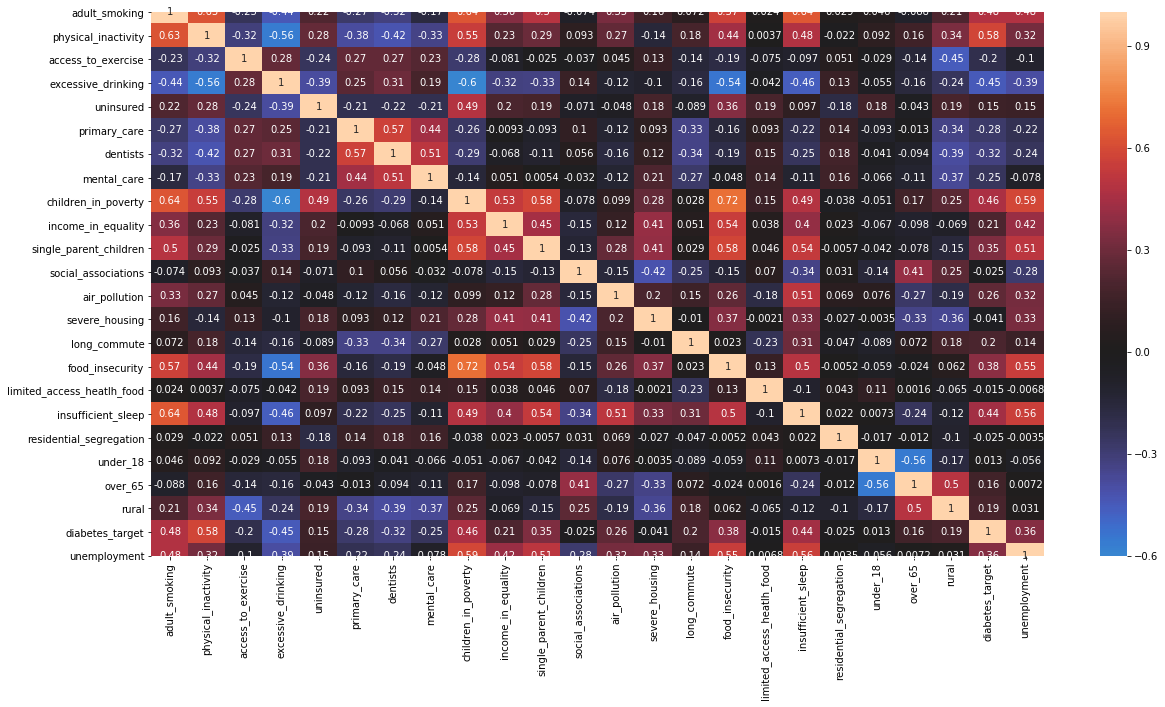

In [95]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_logged_stripped.corr(), center=0, annot = True);

correlations of +|0.6| have been removed

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif_check_df = df_diabetes_logged_stripped.loc[:,[x for x in df_diabetes_logged_stripped.columns if x not in  ['FIPS_code', 'diabetes_target']]]

In [98]:
def takeSecond(elem):
    return elem[1]

In [99]:
vif = [variance_inflation_factor(vif_check_df.values, i) for i in range(vif_check_df.shape[1])]
VIF_list = list(zip([x for x in df_diabetes_logged_stripped.columns if x not in  ['FIPS_code', 'diabetes_target']], vif))


In [100]:
VIF_list.sort(key = takeSecond, reverse = 1)

In [101]:
VIF_list

[('rural', 2459.4806536516776),
 ('dentists', 330.9117181554193),
 ('insufficient_sleep', 281.4610345506938),
 ('primary_care', 269.06962346494237),
 ('adult_smoking', 206.39878653691594),
 ('excessive_drinking', 194.61632863729886),
 ('under_18', 177.21278144684348),
 ('unemployment', 169.5356285140388),
 ('income_in_equality', 158.30805903428202),
 ('over_65', 130.4680622939314),
 ('food_insecurity', 128.34972176731503),
 ('air_pollution', 110.26646691669117),
 ('severe_housing', 85.96879353769222),
 ('mental_care', 75.34072469025796),
 ('physical_inactivity', 74.58679118730001),
 ('children_in_poverty', 69.01513849151769),
 ('uninsured', 47.680442802179634),
 ('social_associations', 32.850736546642295),
 ('single_parent_children', 25.233131713012686),
 ('long_commute', 11.701775798848209),
 ('limited_access_heatlh_food', 9.175453220525686),
 ('residential_segregation', 6.018893542113678),
 ('access_to_exercise', 2.30589274914463)]

In [102]:
i = 0
max_i = len(VIF_list)-5
col_name = ['FIPS_code', 'diabetes_target']
VIF_columns = [(len(VIF_list), VIF_list)]

In [103]:
for i in range (1, max_i):

    col_name.append(VIF_list[0][0])
    
    vif_check_df = df_diabetes_logged_stripped.loc[:,[x for x in df_diabetes_logged_stripped.columns if x not in col_name]]

    vif = [variance_inflation_factor(vif_check_df.values, i) for i in range(vif_check_df.shape[1])]
    VIF_list = list(zip([x for x in df_diabetes_logged_stripped.columns if x not in  col_name], vif))

    VIF_list.sort(key = takeSecond, reverse = 1)

    VIF_columns.append((len(VIF_list), VIF_list))

In [104]:
VIF_columns

[(23,
  [('rural', 2459.4806536516776),
   ('dentists', 330.9117181554193),
   ('insufficient_sleep', 281.4610345506938),
   ('primary_care', 269.06962346494237),
   ('adult_smoking', 206.39878653691594),
   ('excessive_drinking', 194.61632863729886),
   ('under_18', 177.21278144684348),
   ('unemployment', 169.5356285140388),
   ('income_in_equality', 158.30805903428202),
   ('over_65', 130.4680622939314),
   ('food_insecurity', 128.34972176731503),
   ('air_pollution', 110.26646691669117),
   ('severe_housing', 85.96879353769222),
   ('mental_care', 75.34072469025796),
   ('physical_inactivity', 74.58679118730001),
   ('children_in_poverty', 69.01513849151769),
   ('uninsured', 47.680442802179634),
   ('social_associations', 32.850736546642295),
   ('single_parent_children', 25.233131713012686),
   ('long_commute', 11.701775798848209),
   ('limited_access_heatlh_food', 9.175453220525686),
   ('residential_segregation', 6.018893542113678),
   ('access_to_exercise', 2.30589274914463)])

In [105]:
features_to_keep = [element[1] for element in VIF_columns if element[0] == 9]

In [106]:
features_to_keep = [element[0] for element in features_to_keep[0]]

In [107]:
features_to_keep

['uninsured',
 'children_in_poverty',
 'physical_inactivity',
 'single_parent_children',
 'social_associations',
 'limited_access_heatlh_food',
 'long_commute',
 'residential_segregation',
 'access_to_exercise']

In [108]:
df_diabetes_final = df_diabetes_logged_stripped.loc[:, features_to_keep + ['diabetes_target']]

In [109]:
df_diabetes_final

uninsured  children_in_poverty  physical_inactivity  \
2     -2.464990            -1.645065                0.311   
3     -2.234993            -1.917323                0.238   
4     -2.078386            -0.687165                0.282   
5     -2.335101            -1.298283                0.349   
6     -2.110808            -1.687399                0.285   
...         ...                  ...                  ...   
3189  -2.059572            -2.009915                0.256   
3190  -1.898500            -2.673649                0.120   
3191  -2.073939            -2.137071                0.235   
3192  -1.789269            -1.966113                0.260   
3193  -1.941268            -1.966113                0.225   

      single_parent_children  social_associations  limited_access_heatlh_food  \
2                  -1.398363            -2.068958                   -2.121003   
3                  -1.378958            -2.235654                   -2.914258   
4                  -0.558341            -2.468292                   -2.231226   
5                  -1.218565            -2.286942                   -3.649033   
6                  -1.218419            -2.406668                   -3.547328   
...                      ...                  ...                         ...   
3189               -1.449794            -2.306328                   -2.221436   
3190               -1.425343            -1.708680                   -2.602412   
3191               -1.530362            -2.938344                   -2.330249   
3192               -1.323146            -1.638390                   -3.318257   
3193               -1.244128            -1.716704                   -3.170213   

      long_commute  residential_segregation  access_to_exercise  \
2        -0.959720                -1.303883           -0.375749   
3        -0.903868                -1.101414           -0.328906   
4        -1.084709                -1.414128           -0.623142   
5        -0.721547                -0.954527           -1.816993   
6        -0.515838                -1.550897           -1.471883   
...            ...                      ...                 ...   
3189     -1.682009                -1.011200           -0.103749   
3190     -1.924149                -0.922675           -0.002822   
3191     -1.725972                -1.975795           -0.207020   
3192     -2.244316                -1.995795           -0.200462   
3193     -1.500584                -1.930606           -1.303779   

      diabetes_target  
2           -2.198225  
3           -2.234926  
4           -1.737271  
5           -1.931022  
6           -1.771957  
...               ...  
3189        -2.430418  
3190        -3.816713  
3191        -2.180367  
3192        -2.145581  
3193        -2.407946  

[3142 rows x 10 columns]

## <font color=blue>Regression Model Builds<font/>

###  Baseline Model:

In [117]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [118]:
target = df_diabetes_final['diabetes_target']
features = df_diabetes_final.drop(columns=['diabetes_target'])

train test split

In [119]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.33)

In [120]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2105
2105
1037
1037


initialise folds (to be applied on the train data)

In [121]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

In [122]:
regression = LinearRegression()

In [123]:
baseline = cross_validate(regression, X_train, y_train, scoring=('r2'), cv=crossvalidation, return_train_score=True)

In [124]:
baseline

{'fit_time': array([0.00479984, 0.00223899, 0.00265789, 0.00232196, 0.00221276]),
 'score_time': array([0.00128007, 0.00119495, 0.00113893, 0.0010891 , 0.00082898]),
 'test_score': array([0.41728517, 0.35670574, 0.39349583, 0.35073258, 0.42632097]),
 'train_score': array([0.39361866, 0.40590459, 0.39942603, 0.40909482, 0.39056219])}

In [125]:
print('train_r2:',baseline['train_score'].mean())
print('test_r2:',baseline['test_score'].mean())

train_r2: 0.399721258800995
test_r2: 0.3889080585994811


In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [128]:
X_poly_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names(features.columns))
X_poly_train.head()

uninsured  children_in_poverty  physical_inactivity  \
0  -1.708275            -1.148854                0.317   
1  -2.323352            -2.244316                0.281   
2  -2.162247            -1.227583                0.300   
3  -2.129497            -1.220780                0.287   
4  -2.858542            -1.335601                0.268   

   single_parent_children  social_associations  limited_access_heatlh_food  \
0               -0.974776            -2.372985                   -2.817846   
1               -1.963530            -2.209300                   -3.431882   
2               -0.917923            -2.227359                   -1.769662   
3               -1.086419            -2.334390                   -3.300301   
4               -1.176466            -1.620552                   -2.625376   

   long_commute  residential_segregation  access_to_exercise  uninsured^2  \
0     -1.194022                -2.004789           -0.417712     2.918202   
1     -0.843970                -0.790068           -1.106207     5.397965   
2     -0.825536                -1.737252           -1.332674     4.675311   
3     -1.406497                -0.939981           -0.317920     4.534759   
4     -1.402424                -1.106971           -0.287720     8.171264   

   uninsured children_in_poverty  uninsured physical_inactivity  \
0                       1.962557                      -0.541523   
1                       5.214337                      -0.652862   
2                       2.654337                      -0.648674   
3                       2.599648                      -0.611166   
4                       3.817873                      -0.766089   

   uninsured single_parent_children  uninsured social_associations  \
0                          1.665185                       4.053711   
1                          4.561972                       5.132981   
2                          1.984777                       4.816099   
3                          2.313527                       4.971077   
4                          3.362976                       4.632417   

   uninsured limited_access_heatlh_food  uninsured long_commute  \
0                              4.813656                2.039718   
1                              7.973469                1.960840   
2                              3.826446                1.785013   
3                              7.027983                2.995132   
4                              7.504749                4.008887   

   uninsured residential_segregation  uninsured access_to_exercise  \
0                           3.424731                      0.713566   
1                           1.835607                      2.570108   
2                           3.756368                      2.881570   
3                           2.001687                      0.677010   
4                           3.164322                      0.822460   

   children_in_poverty^2  children_in_poverty physical_inactivity  \
0               1.319864                                -0.364187   
1               5.036955                                -0.630653   
2               1.506959                                -0.368275   
3               1.490304                                -0.350364   
4               1.783831                                -0.357941   

   children_in_poverty single_parent_children  \
0                                    1.119875   
1                                    4.406783   
2                                    1.126827   
3                                    1.326279   
4                                    1.571289   

   children_in_poverty social_associations  \
0                                 2.726212   
1                                 4.958367   
2                                 2.734267   
3                                 2.849776   
4                                 2.164412   

   children_in_poverty limited_access_heatlh_food  \
0                                 

In [129]:
len(X_poly_train.columns)

219

In [130]:
# Initialize the scaler
scaler = StandardScaler()

#   Scale all continuous features
#   scale both train and test data.
transformed_training_features = scaler.fit_transform(X_poly_train.iloc[:,:])
transformed_testing_features = scaler.transform(X_poly_test.iloc[:,:])

In [131]:
X_train_transformed = pd.DataFrame(scaler.transform(X_poly_train.iloc[:,:]), 
                                   columns=X_poly_train.columns[:], 
                                   index=X_poly_train.index)

In [132]:
X_test_transformed = pd.DataFrame(scaler.transform(X_poly_test.iloc[:,:]), 
                                   columns=X_poly_test.columns[:], 
                                   index=X_poly_test.index)

In [133]:
from sklearn.model_selection import cross_validate

In [134]:
baseline_poly = cross_validate(regression, X_train_transformed, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
                              return_train_score=True)

In [135]:
baseline_poly

{'fit_time': array([0.02643585, 0.01103115, 0.01043916, 0.01301003, 0.00960898]),
 'score_time': array([0.00250816, 0.00178814, 0.00176692, 0.001899  , 0.00181794]),
 'test_r2': array([ 0.2945154 , -0.57151665, -0.41464653,  0.04898503,  0.32620418]),
 'train_r2': array([0.52406791, 0.53469251, 0.54173878, 0.53975703, 0.51586649]),
 'test_neg_mean_squared_error': array([-0.0846338 , -0.17207344, -0.19166553, -0.11163057, -0.08034267]),
 'train_neg_mean_squared_error': array([-0.05746403, -0.05732477, -0.05356284, -0.05585497, -0.05846654])}

In [136]:
print('train_r2:',baseline_poly['train_r2'].mean())
print('test_r2:',baseline_poly['test_r2'].mean())

train_r2: 0.5312245438292166
test_r2: -0.06329171645802163


In [163]:
logdata=np.log(12.4)
logdata

2.517696472610991

In [165]:
reverse = np.exp(logdata)
reverse

12.4

In [ ]:
y_new_inverse = scaler.inverse_transform(y_new)


In [276]:
# Visualitations for presentation: Plot the scatter plot of the features of our chosen model
Model_features = ['physical_inactivity','children_in_poverty','uninsured']

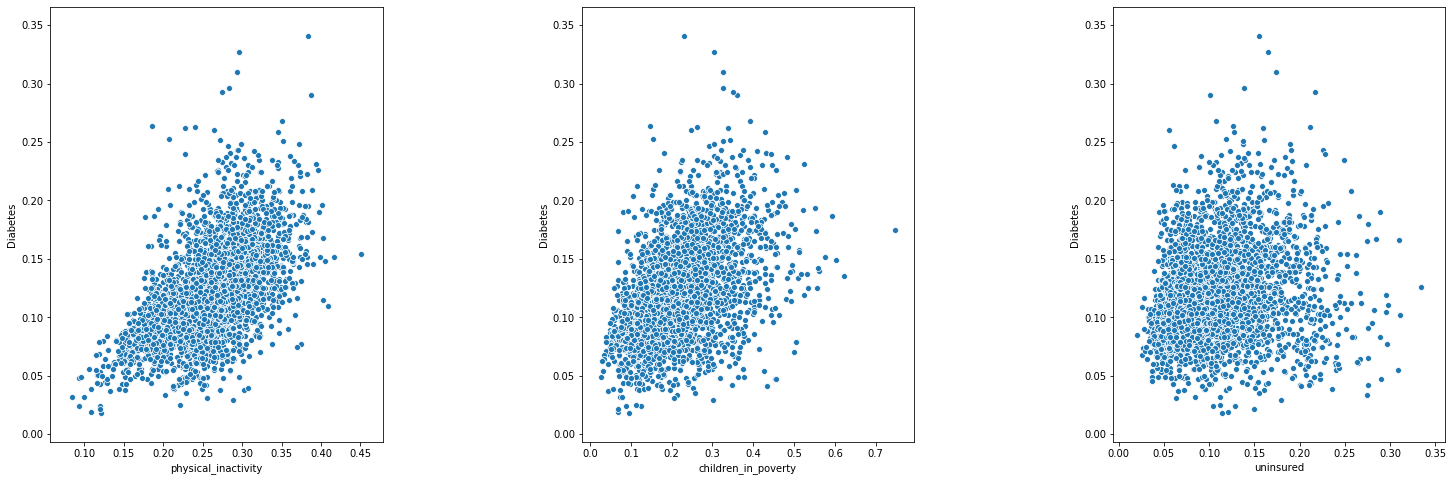

In [303]:
plt.figure(figsize=(25,8))

for i, col in enumerate(Model_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot( x= col,y="diabetes_target", data= df_diabetes_county_2)
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.ylabel('Diabetes')
    

Text(0.5, 0, 'Physical Inactivity')

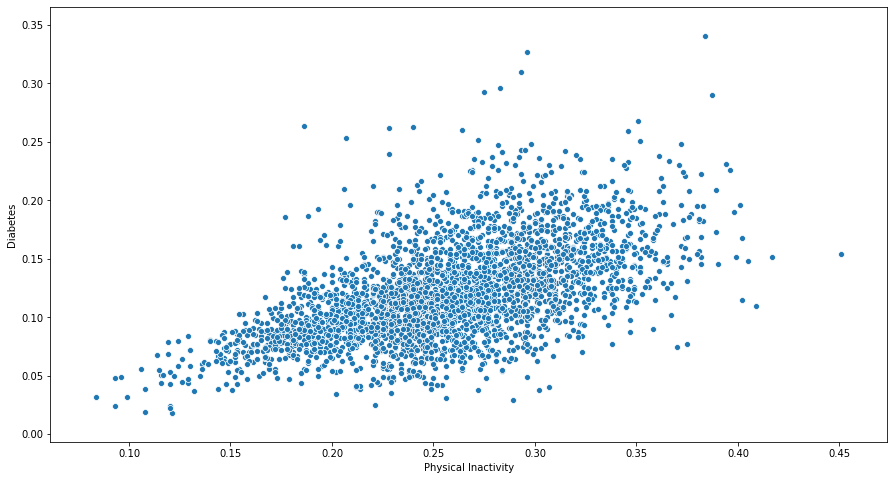

In [307]:
plt.figure(figsize=(15,8))
sns.scatterplot( x='physical_inactivity',y="diabetes_target", data= df_diabetes_county_2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.ylabel('Diabetes')
plt.xlabel('Physical Inactivity')
    

Text(0.5, 0, 'Children in Poverty')

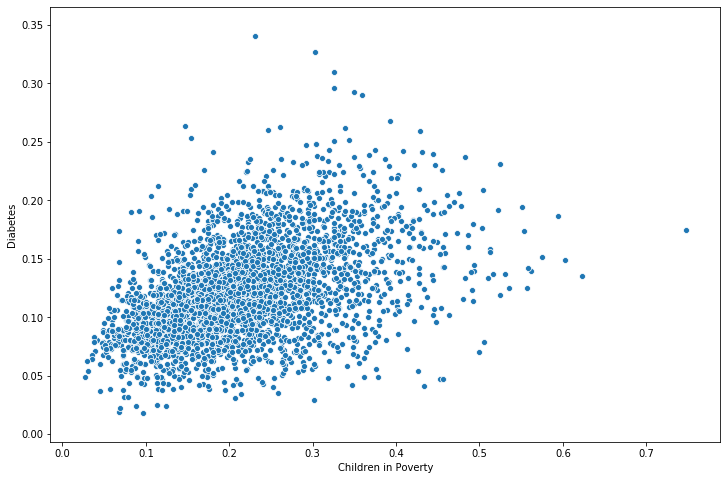

In [310]:
plt.figure(figsize=(12,8))
sns.scatterplot( x='children_in_poverty',y="diabetes_target", data= df_diabetes_county_2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.ylabel('Diabetes')
plt.xlabel('Children in Poverty')

Text(0.5, 0, 'Children in Poverty')

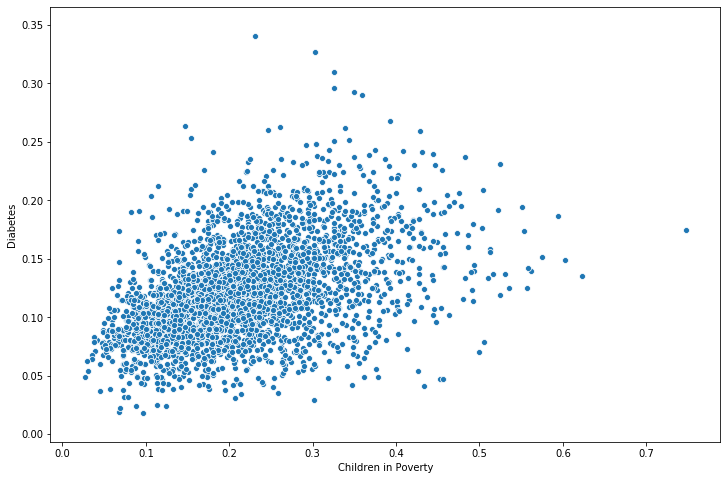

In [311]:
plt.figure(figsize=(12,8))
sns.scatterplot( x='children_in_poverty',y="diabetes_target", data= df_diabetes_county_2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.ylabel('Diabetes')
plt.xlabel('Children in Poverty')

Text(0.5, 0, 'Uninsured')

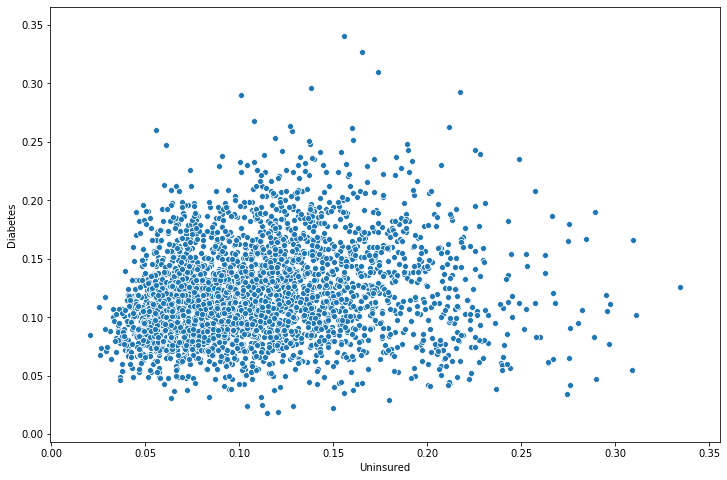

In [312]:
plt.figure(figsize=(12,8))
sns.scatterplot( x='uninsured',y="diabetes_target", data= df_diabetes_county_2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.ylabel('Diabetes')
plt.xlabel('Uninsured')

In [315]:
max(df_diabetes_county_2["diabetes_target"])

0.341